In [1]:
from dataset import *
from helpers.ipython import *
from helpers.model import *

%matplotlib inline

In [2]:
def get_y():
    return data.get('train', 'y')

def get_X(dset='train'):
    return data.extract(dset, [
        ('nums', None),
        ('cats', None),
        ('nans', None),
    ]).fillna(-999)

X, y = get_X(), get_y();

# Models

## XGB

In [5]:
model = LogisticXGB(n_estimators=350, learning_rate=0.05, max_depth=7, seed=42)
model.fit(X, y)

LogisticXGB(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
      learning_rate=0.05, max_delta_step=0, max_depth=7,
      min_child_weight=1, missing=None, n_estimators=350, nthread=-1,
      objective='binary:logistic', reg_alpha=0, reg_lambda=1,
      scale_pos_weight=1, seed=42, silent=True, subsample=1)

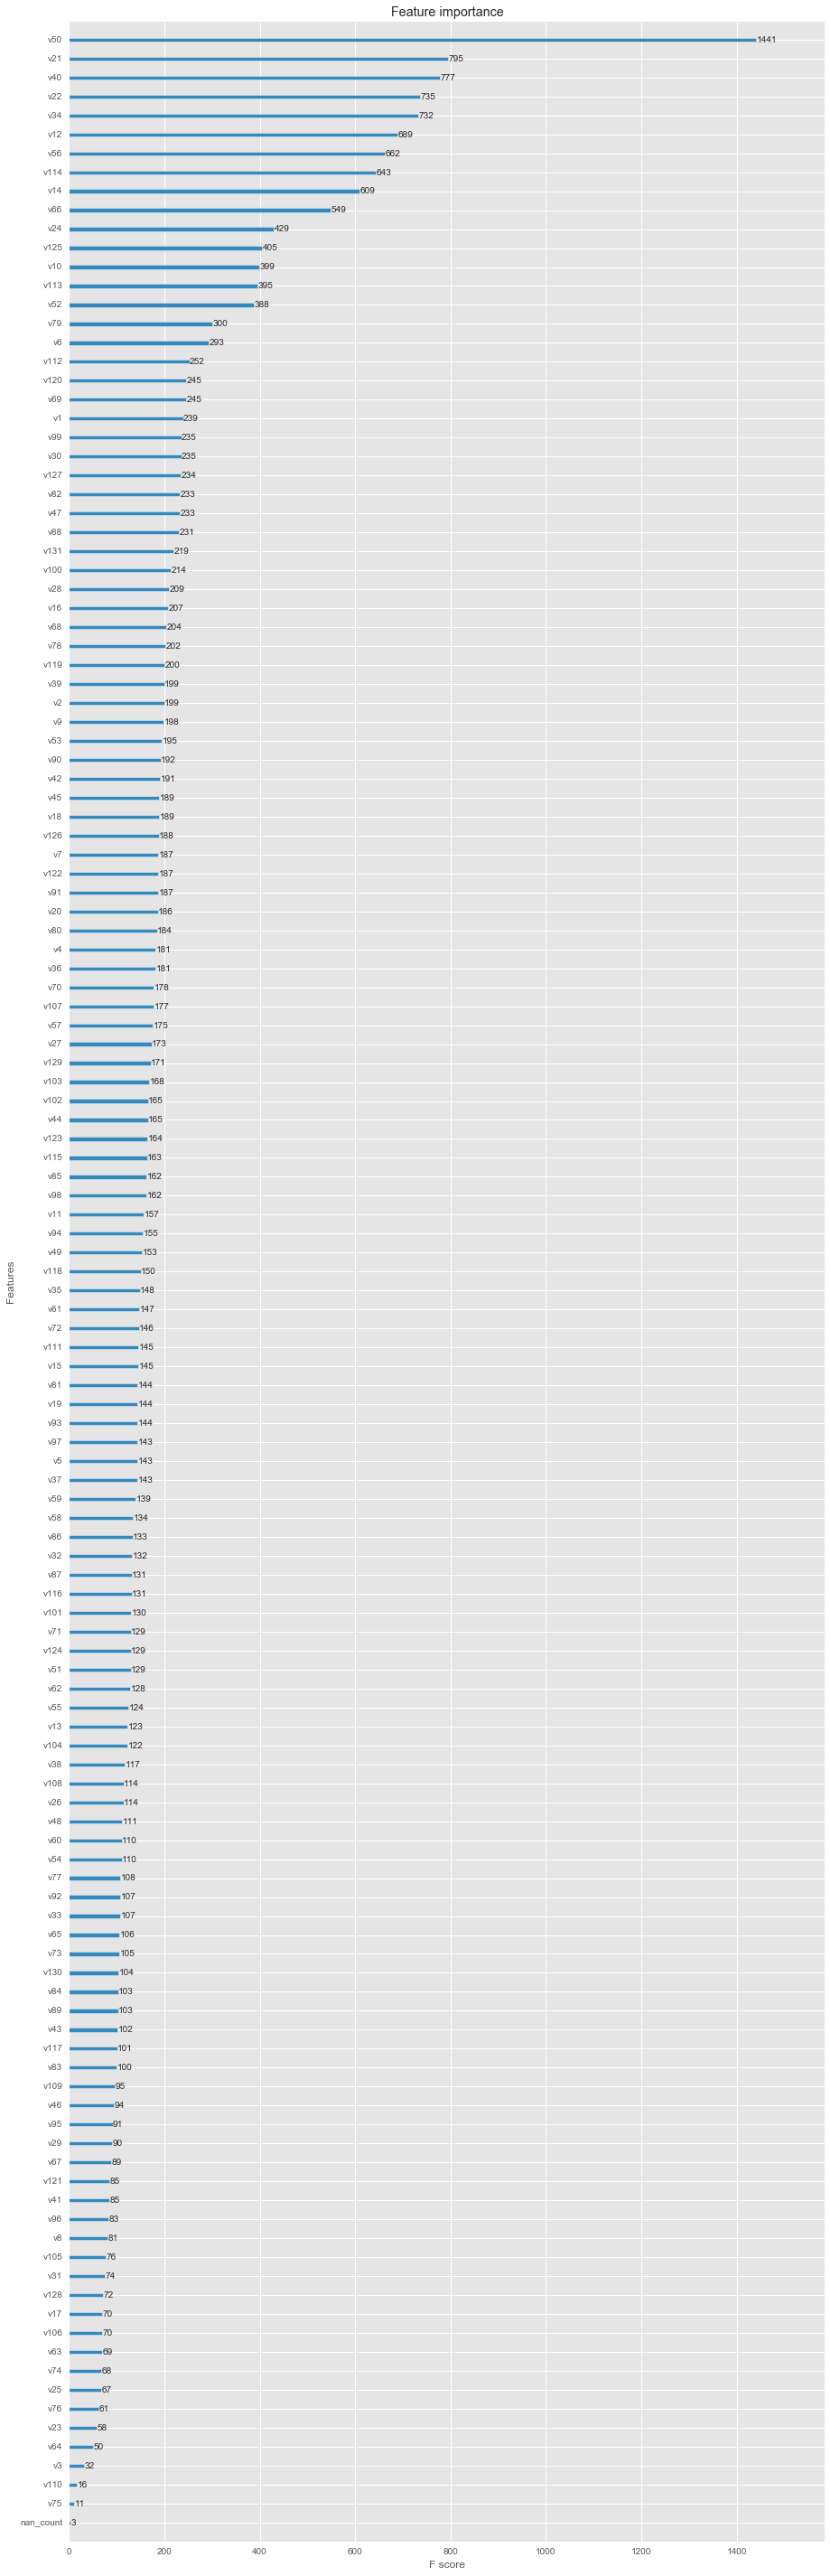

In [8]:
figsize(15, 50)
model.plot_importance()

## ExtraTrees

In [3]:
model = skl.ensemble.ExtraTreesClassifier(n_estimators=1000, criterion='entropy', min_samples_leaf=5,
    max_features=0.8, n_jobs=8, random_state=42, verbose=True)
model.fit(X, y)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   38.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 12.9min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed: 16.4min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features=0.8, max_leaf_nodes=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
           oob_score=False, random_state=42, verbose=True,
           warm_start=False)

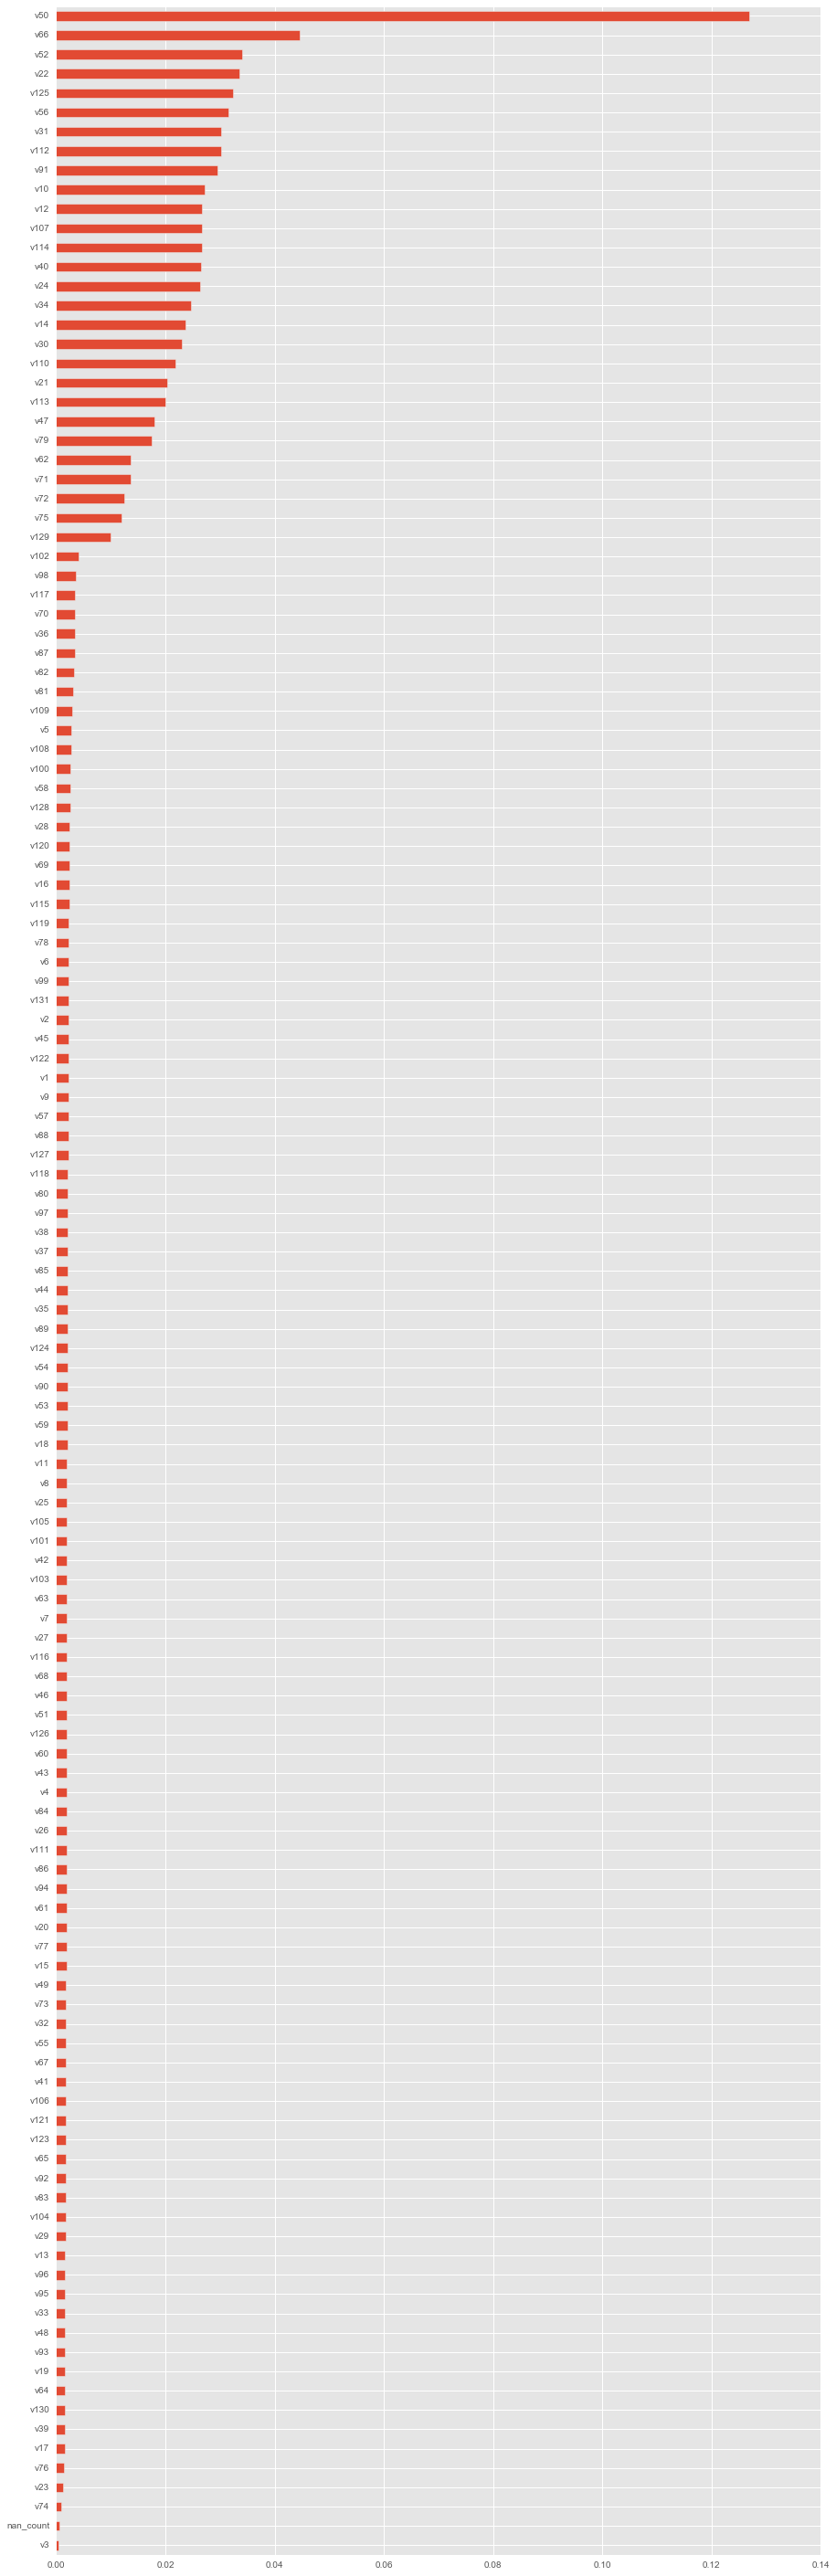

In [4]:
figsize(15, 50)
model_get_feature_scores(model, X)['val'].iloc[::-1].plot.barh()

# Features

In [6]:
figsize(15, 5)

def hist_num(v):
    v[y == 0].hist(bins=100, alpha=.5)
    v[y == 1].hist(bins=100, alpha=.5)
    
    
def bar_cat(v):
    v[y == 0].value_counts().plot.bar(alpha=.5)
    v[y == 1].value_counts().plot.bar(color='dodgerblue', alpha=.5)
    
def ratio_cat(v, min_values = 50):
    c = v[y == 0].value_counts()
    ix = list(c[c > min_values].index)
    df = pd.DataFrame(index=ix)
    for col in ix:
        yc = y[v == col].value_counts()
        df.ix[col, 'ratio'] = yc.ix[0] / yc.ix[1]
        df.ix[col, 'cnt'] = yc.ix[0]

    return df.sort_values('ratio', ascending=False)

## nums

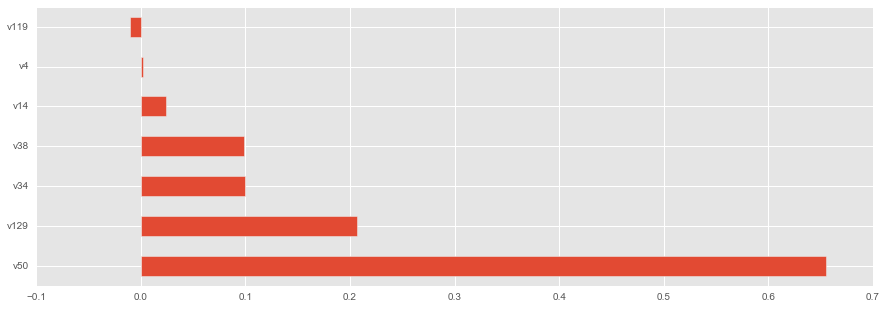

In [15]:
lin_important = model_lr_explore_l1(data.get('train', 'scaled_nums'), y, C=0.001)
lin_important.plot.barh()

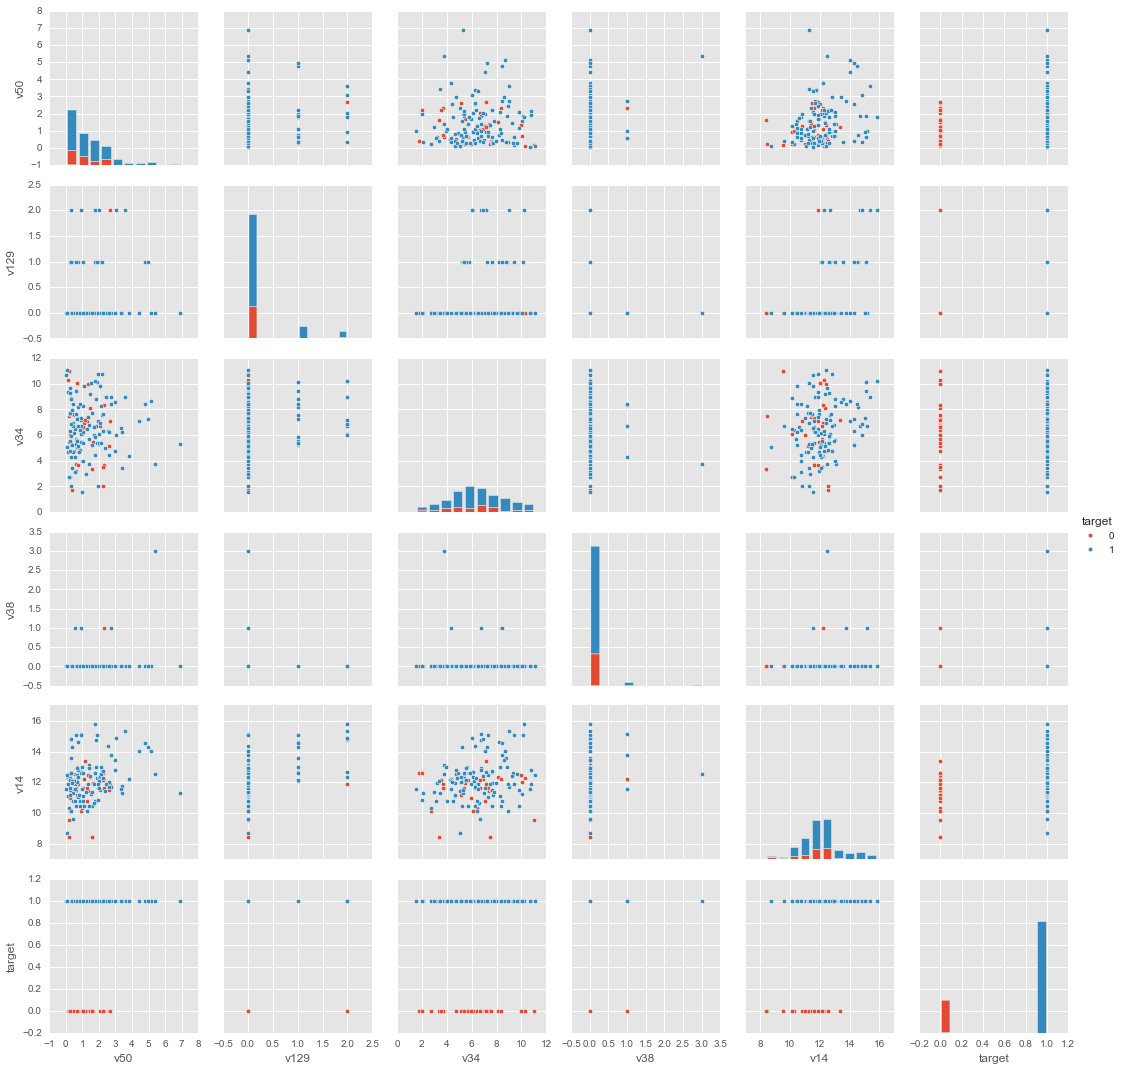

In [35]:
vars = ['v50', 'v129', 'v34', 'v38', 'v14']
df = data.get('train', 'nums')[vars]
df = pd.concat([df, y], axis=1).sample(150)
sns.pairplot(df, hue="target")

/home/tyz910/.virtualenvs/jupnb/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


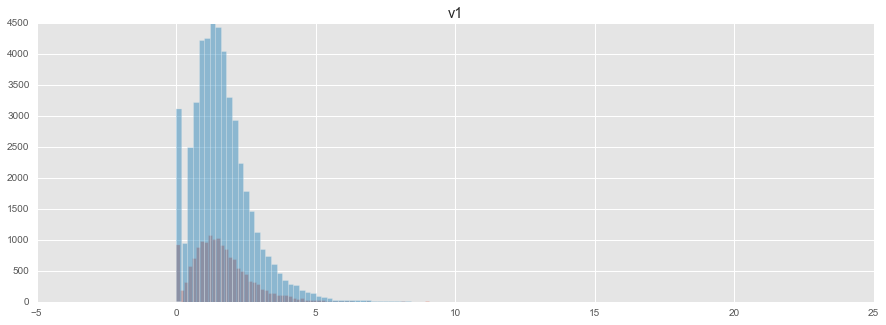

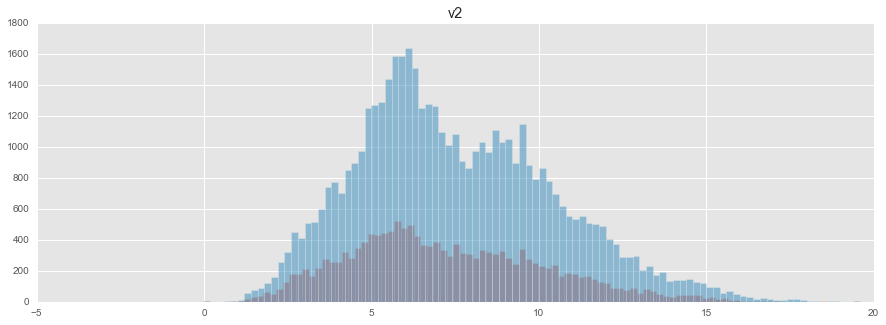

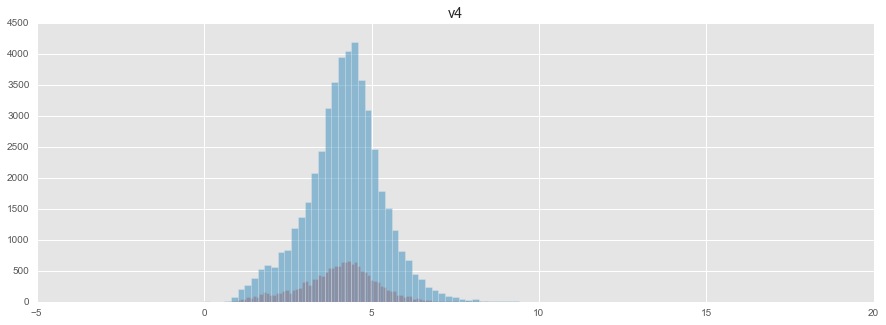

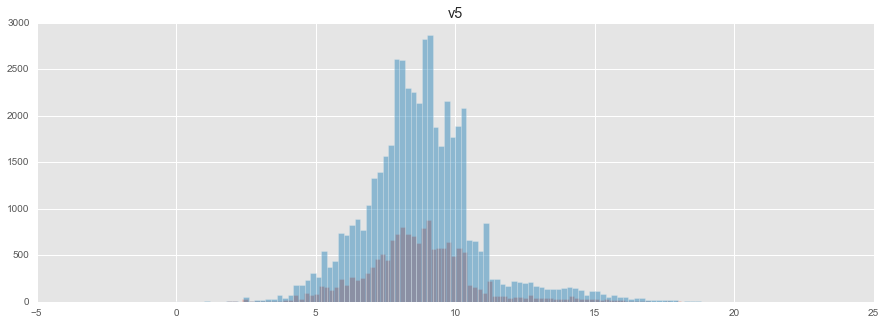

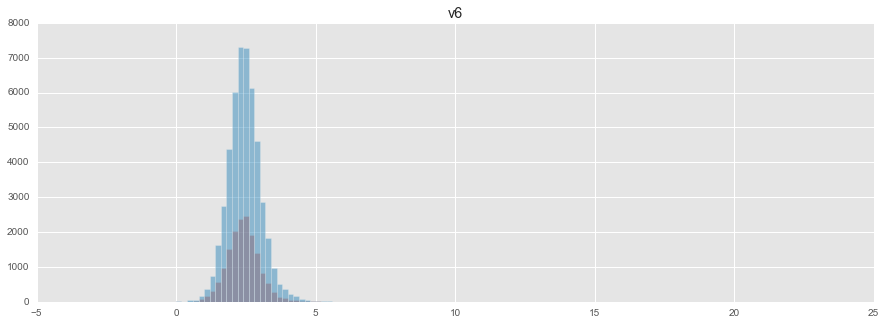

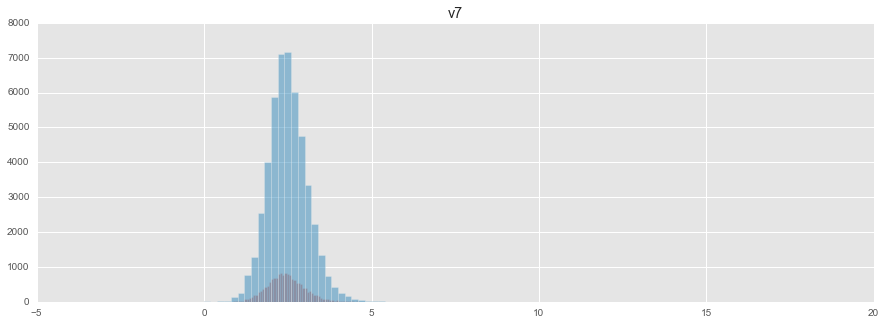

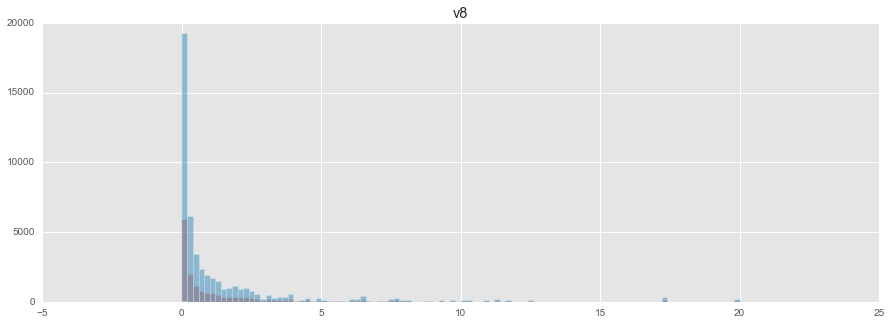

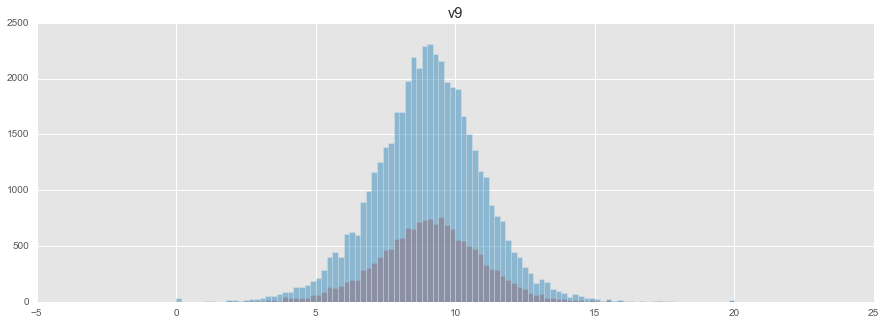

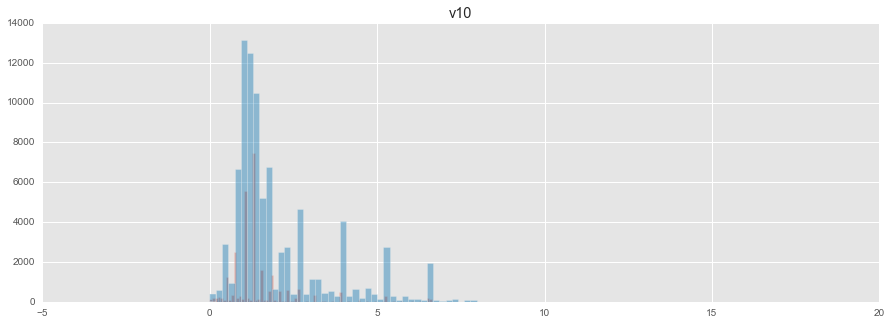

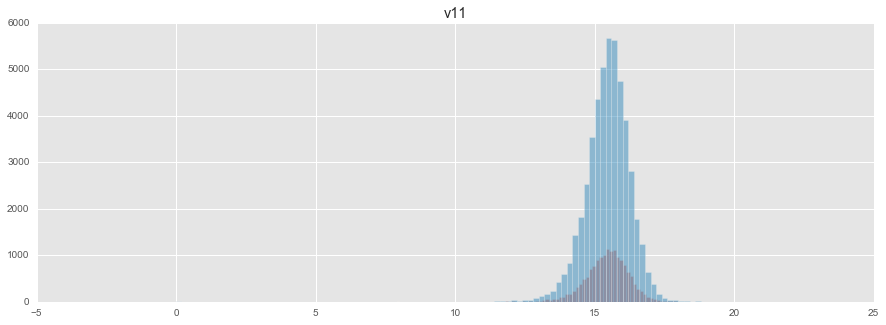

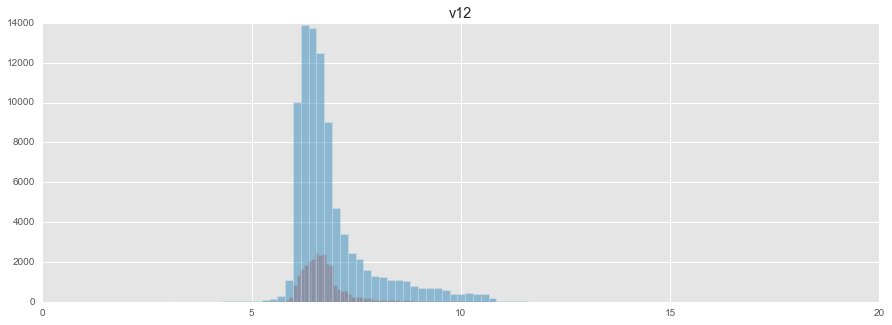

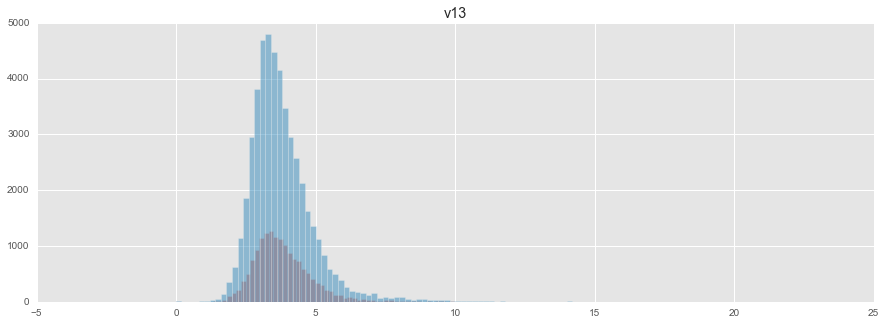

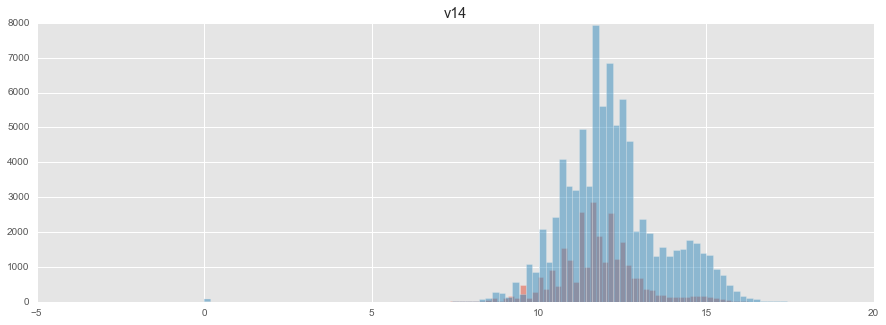

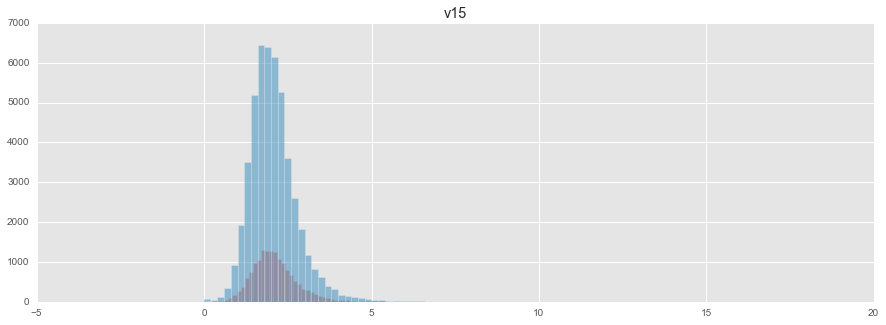

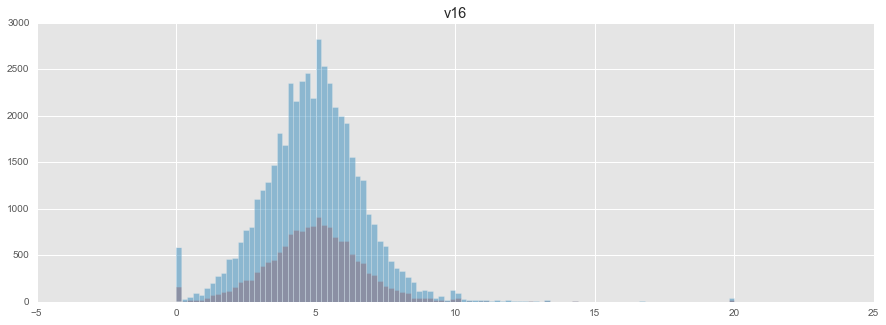

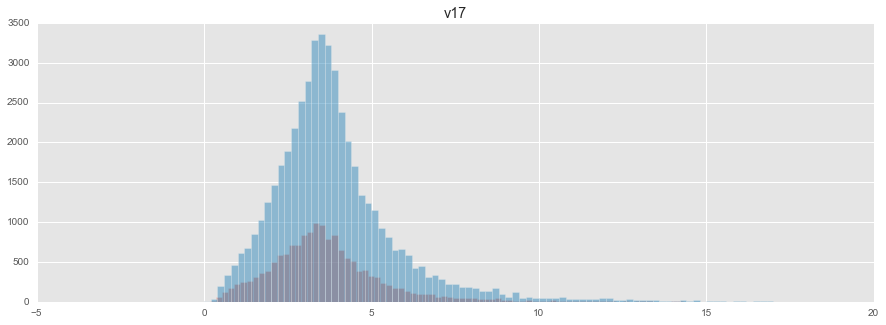

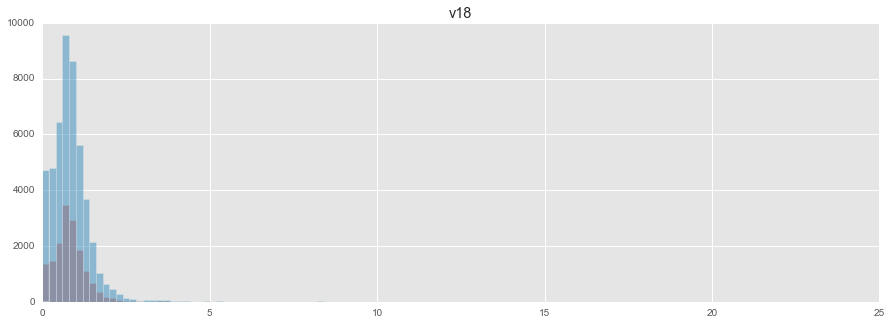

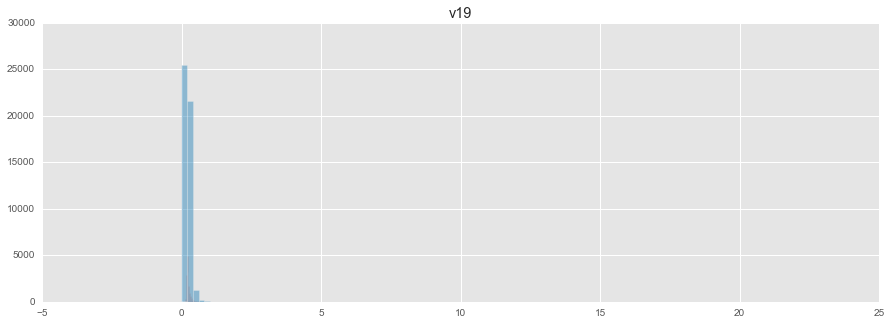

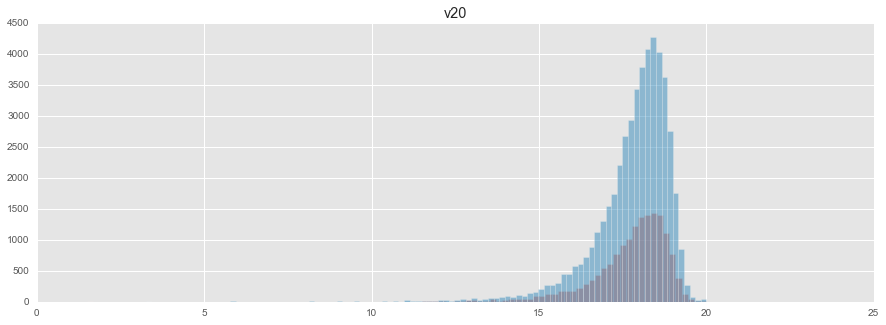

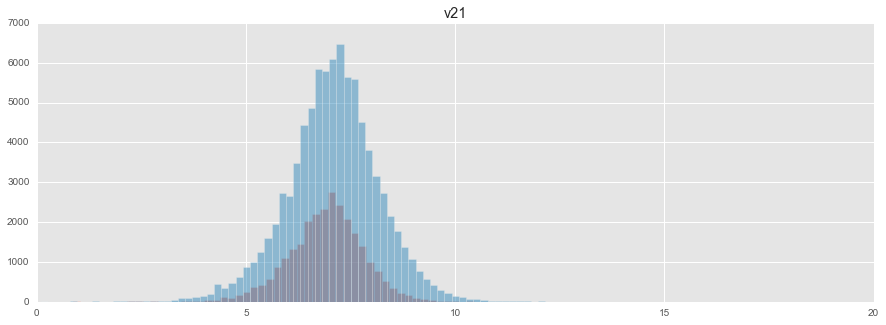

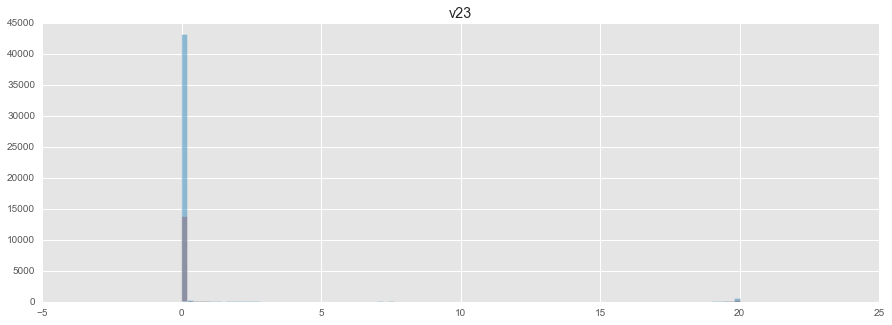

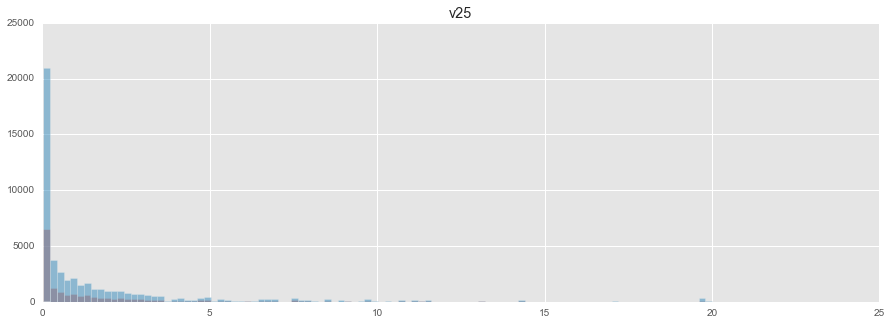

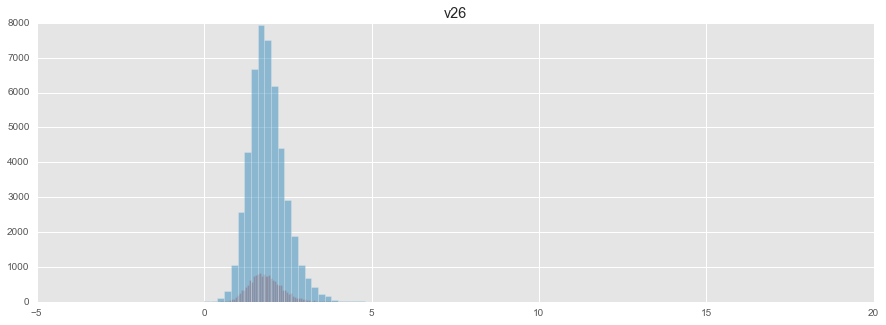

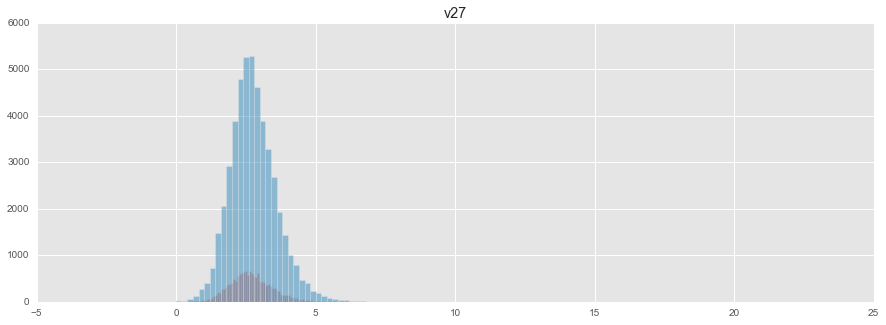

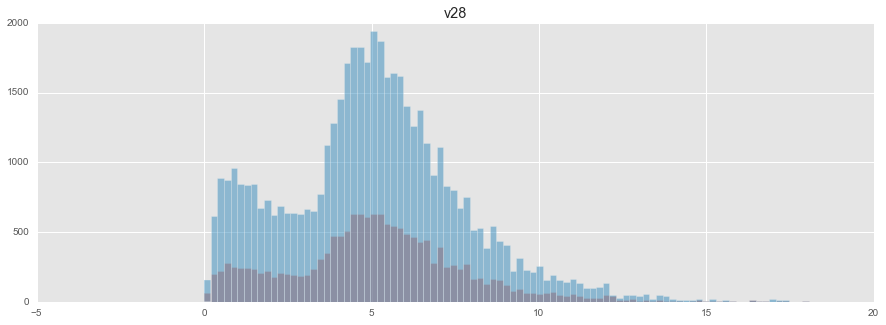

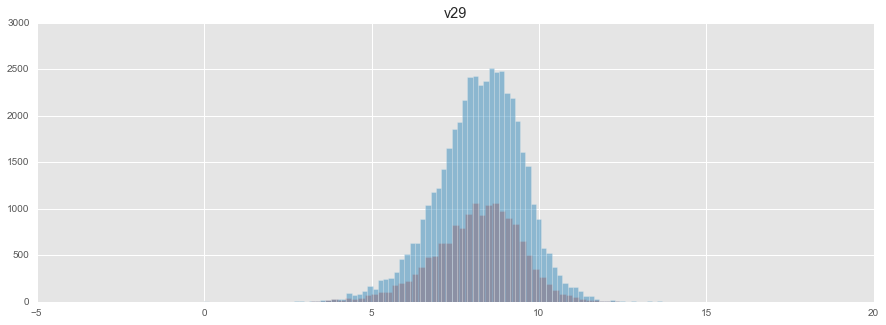

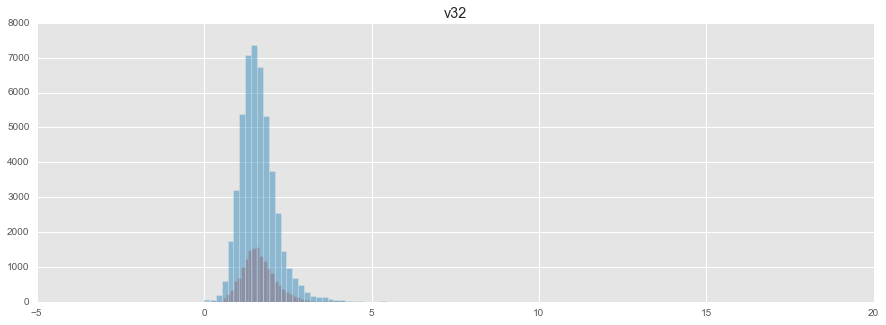

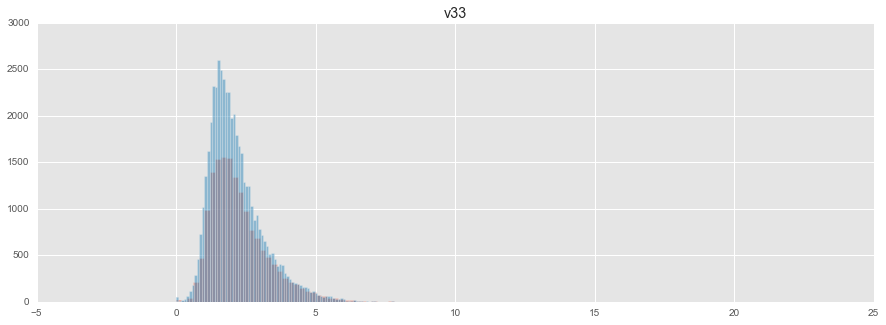

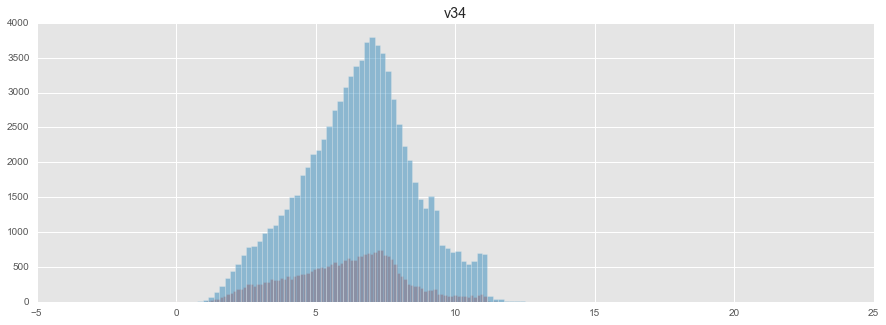

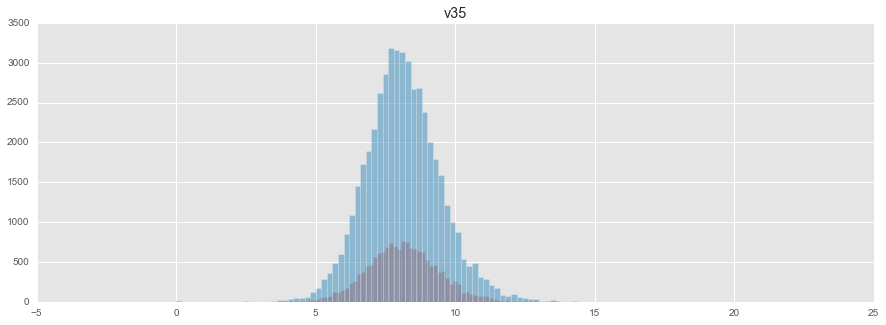

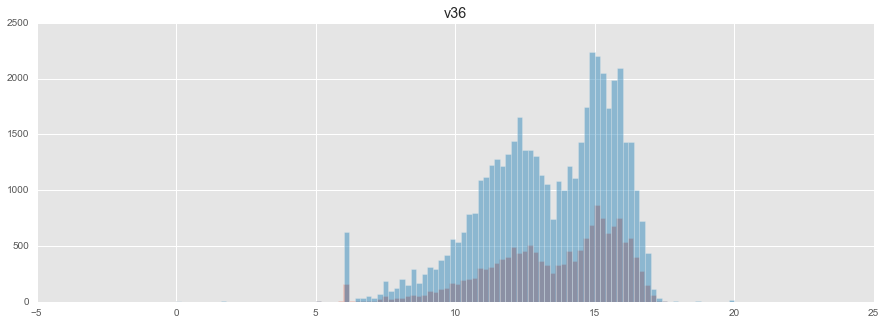

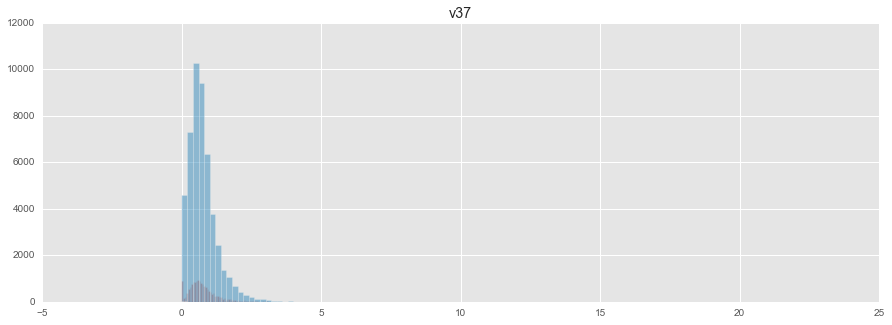

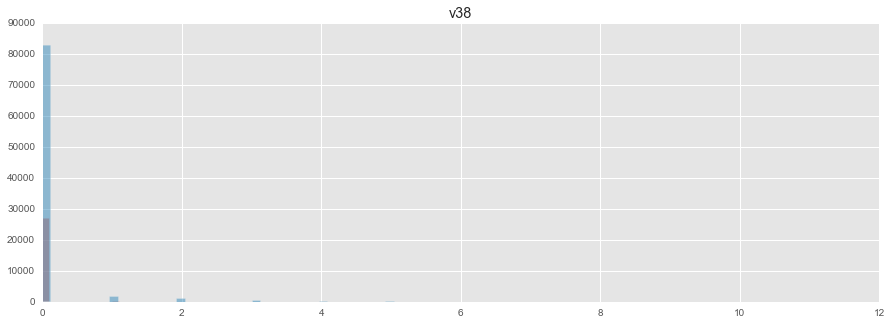

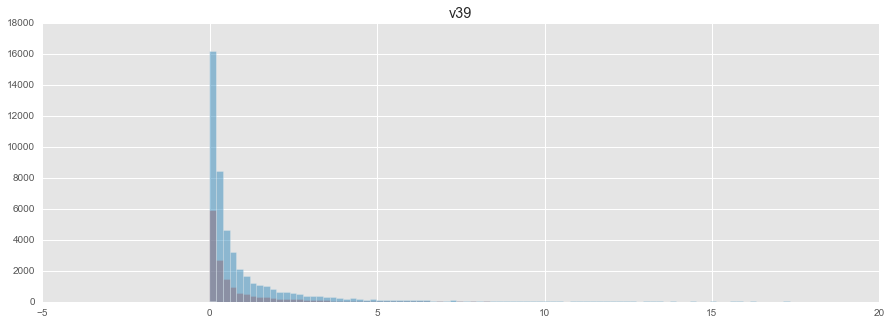

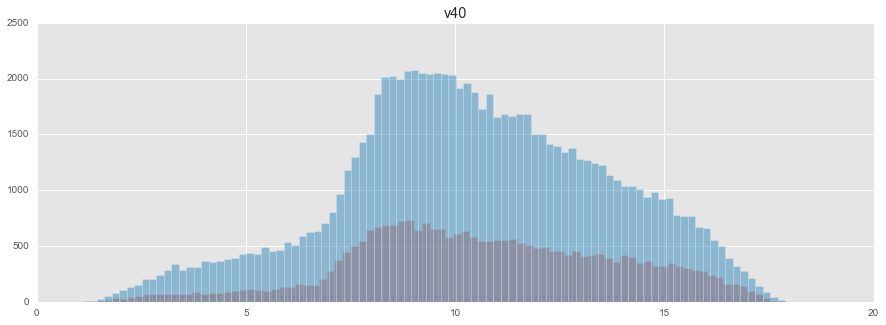

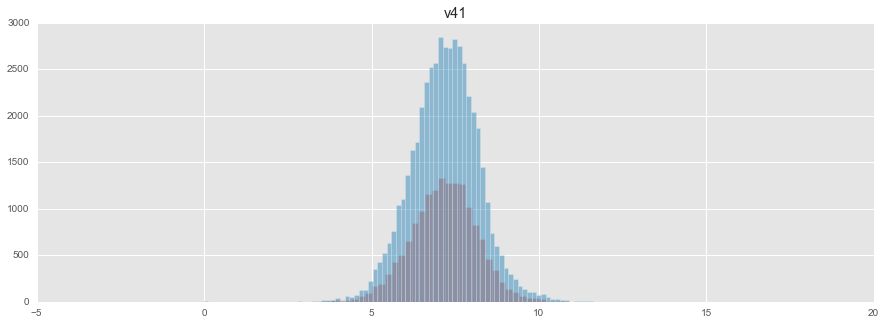

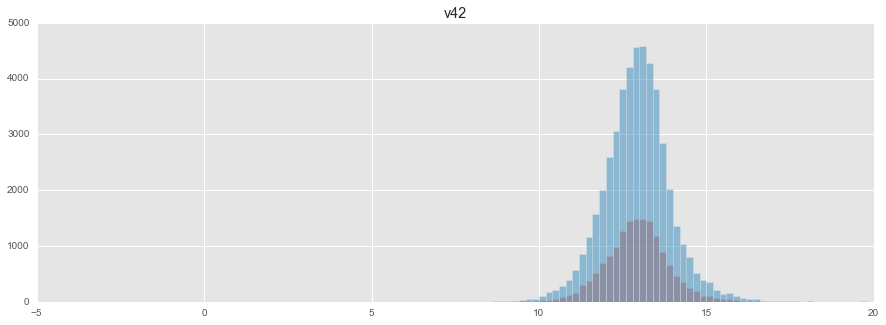

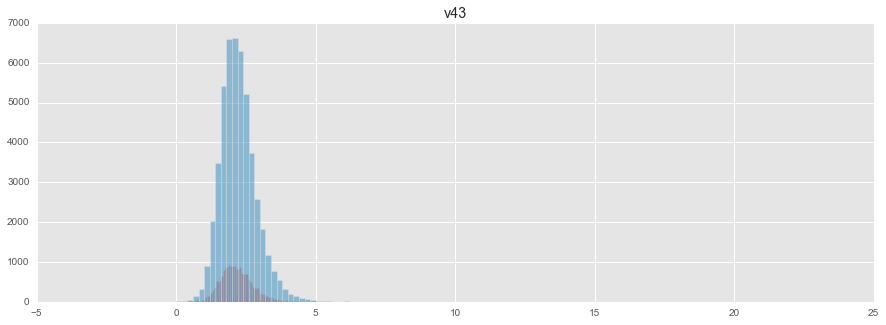

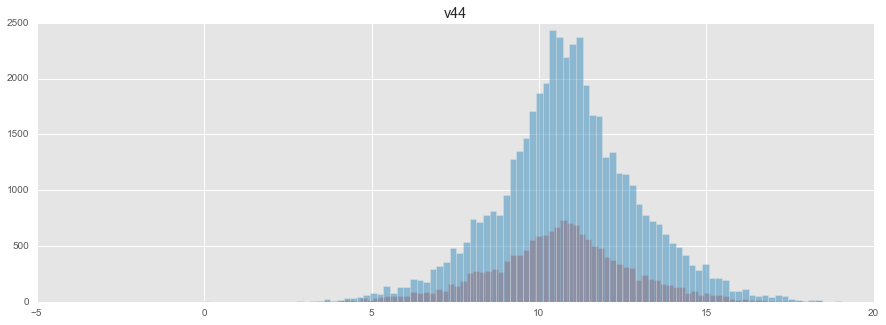

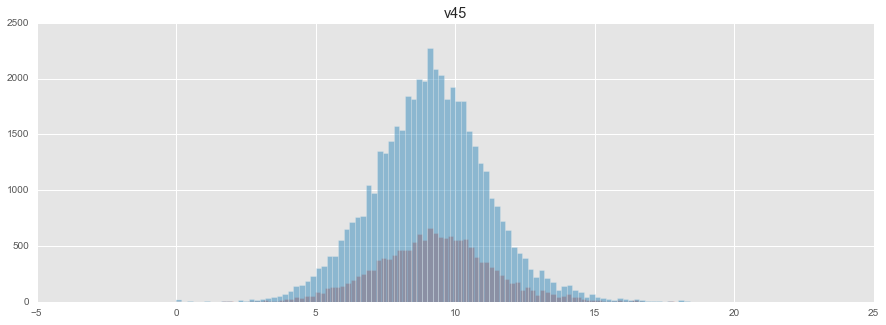

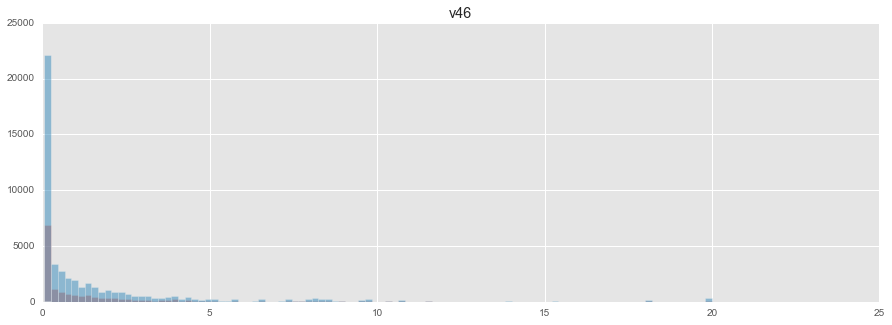

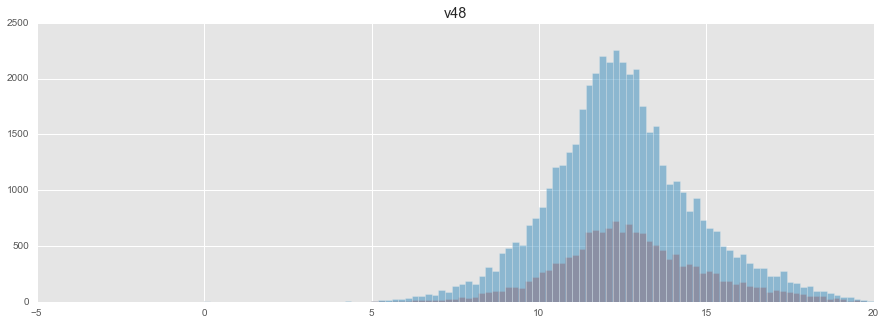

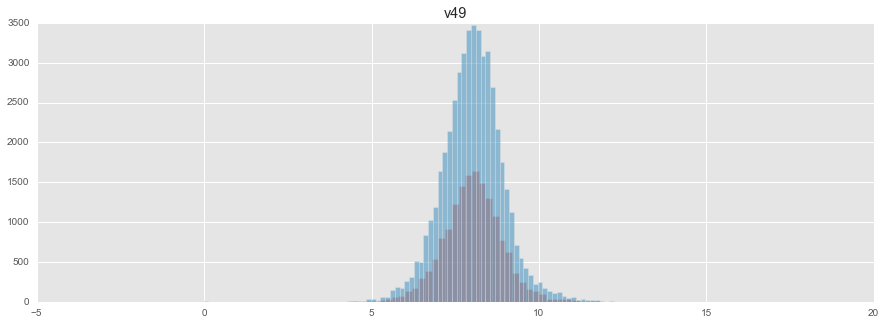

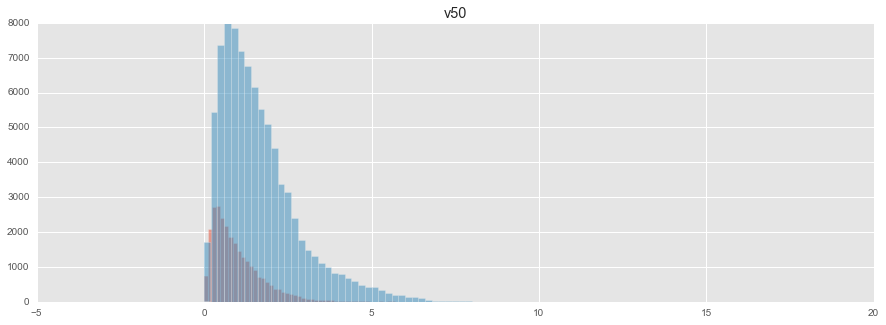

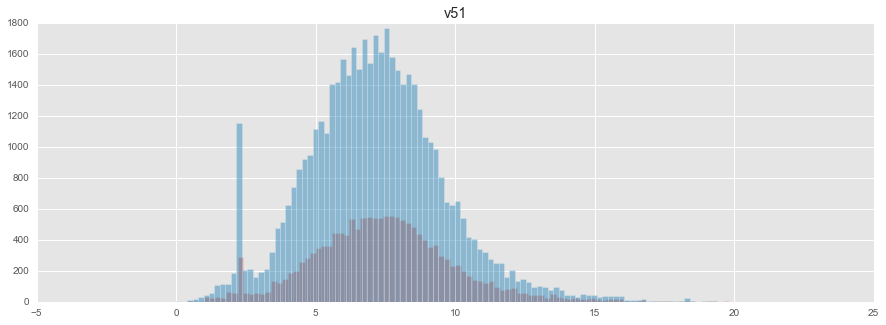

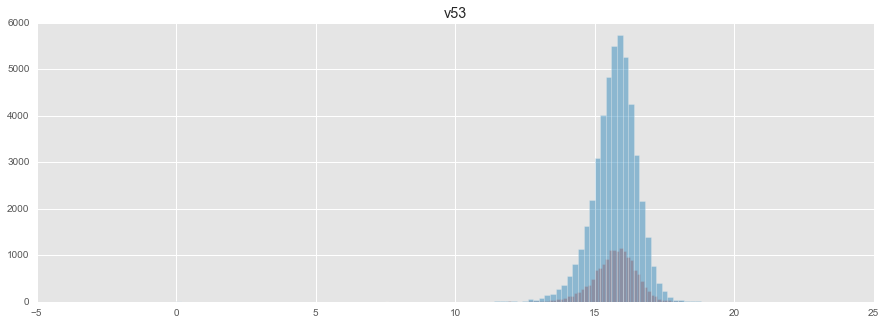

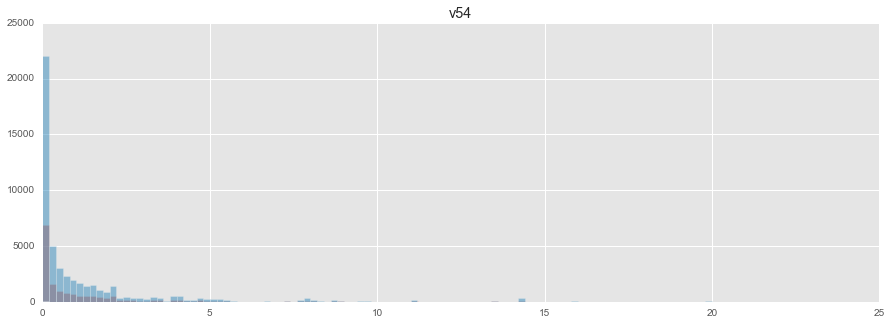

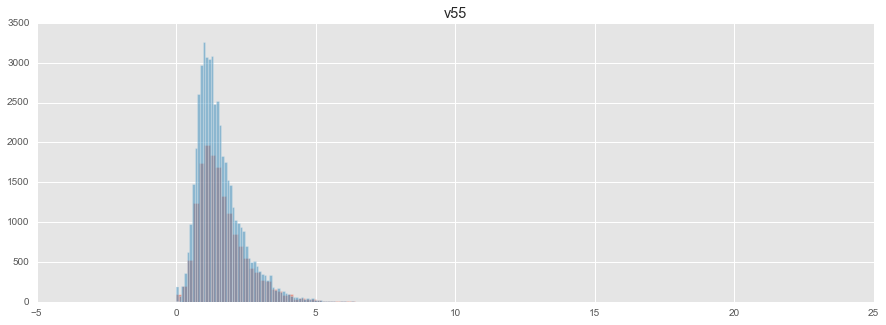

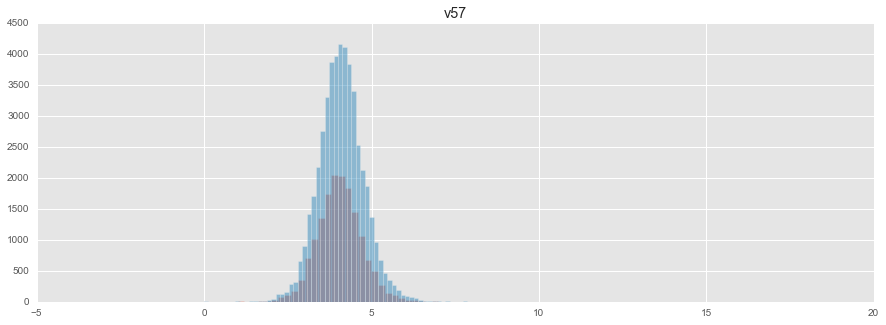

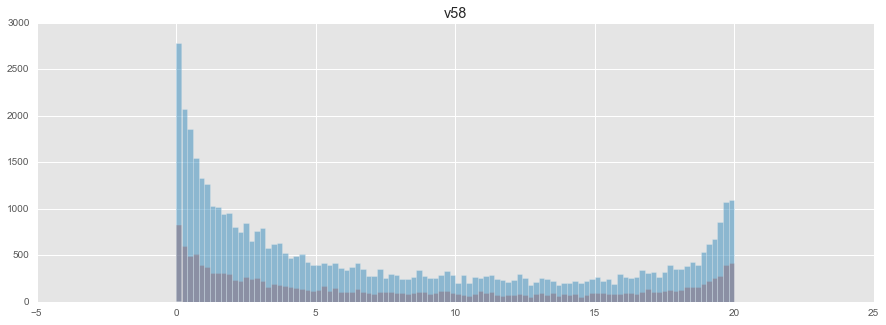

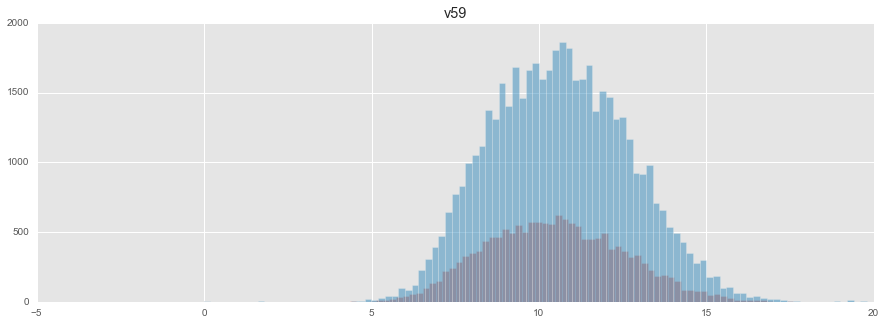

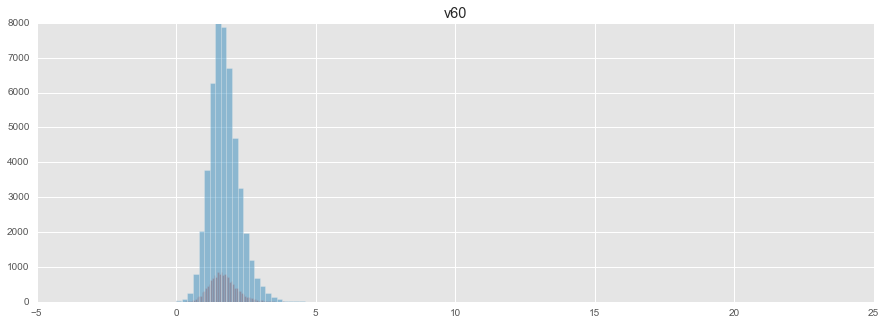

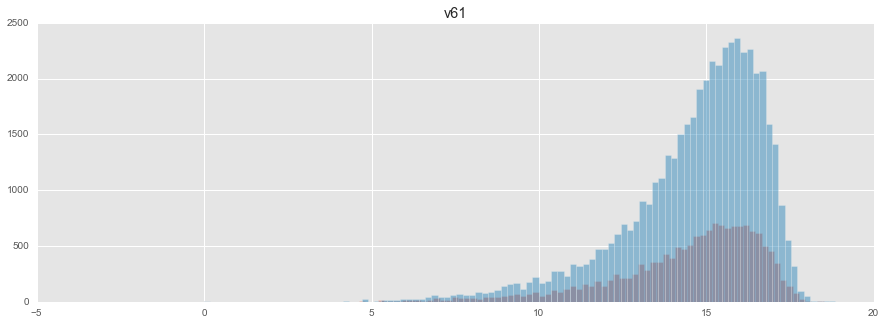

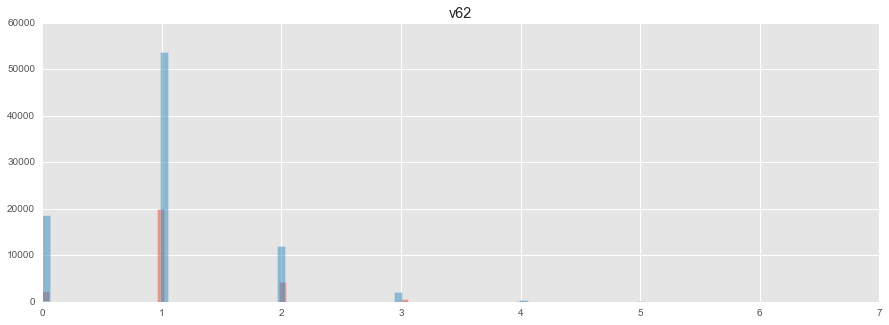

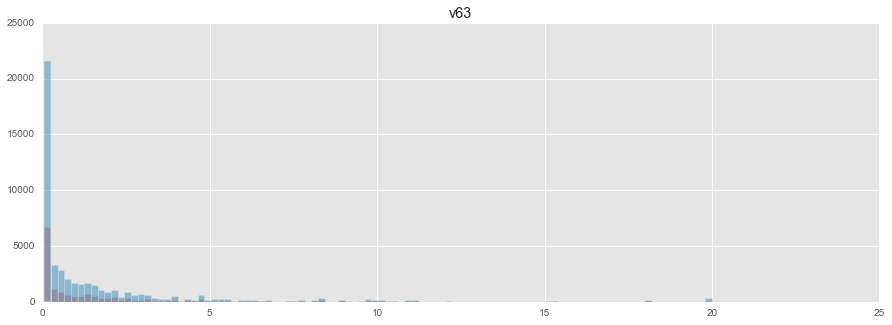

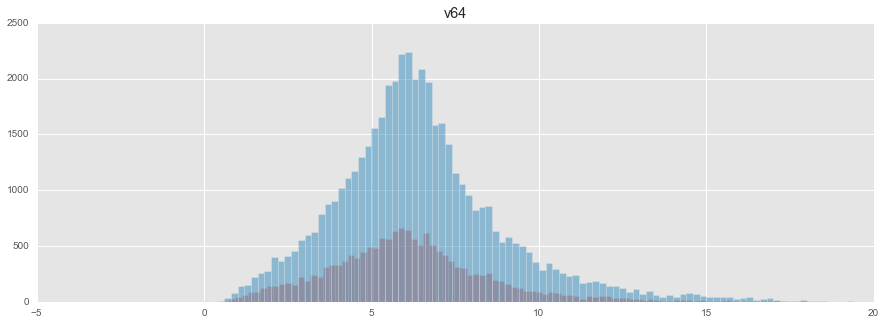

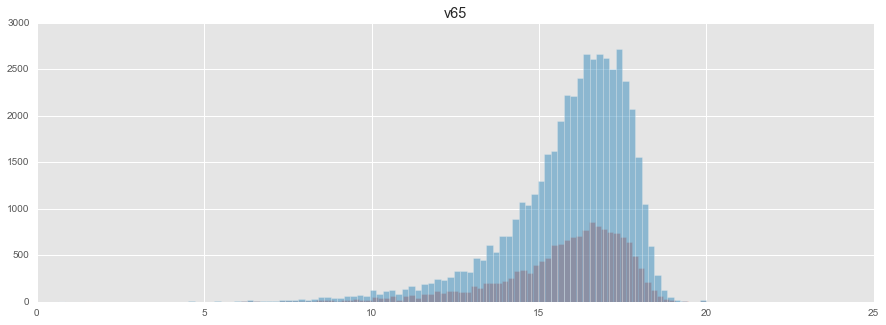

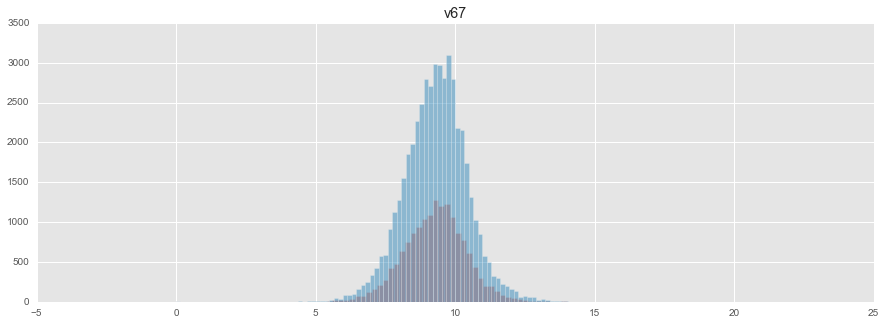

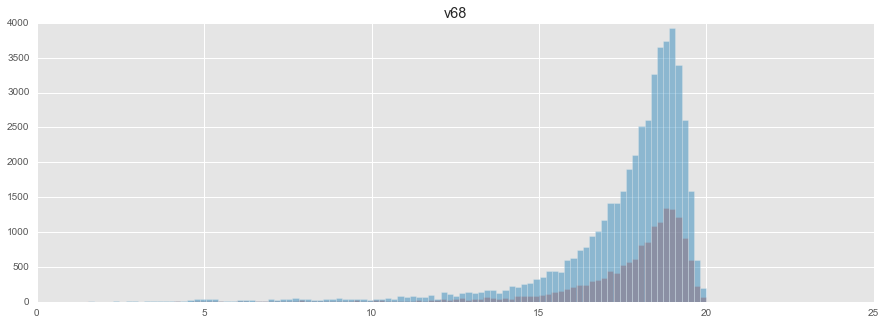

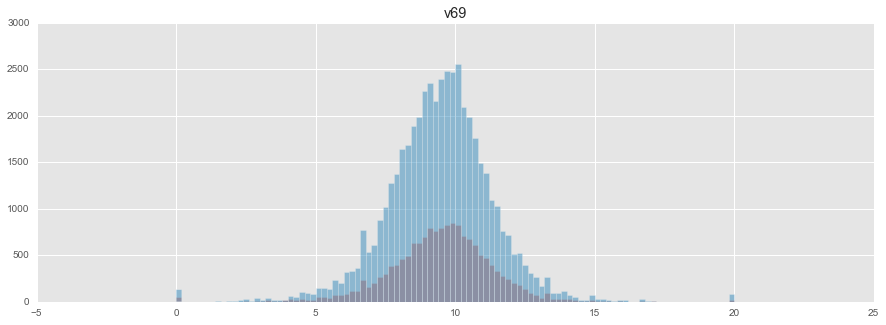

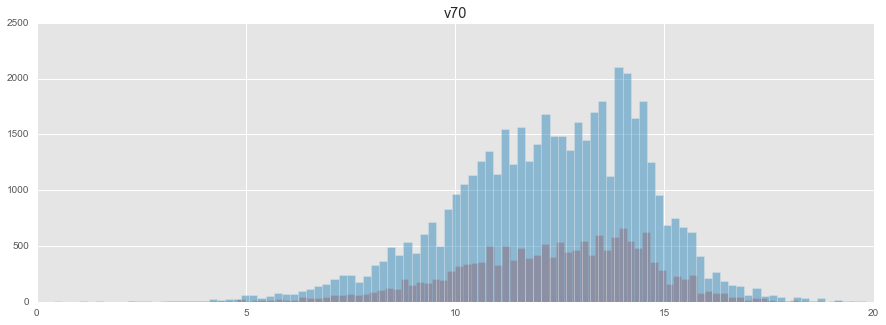

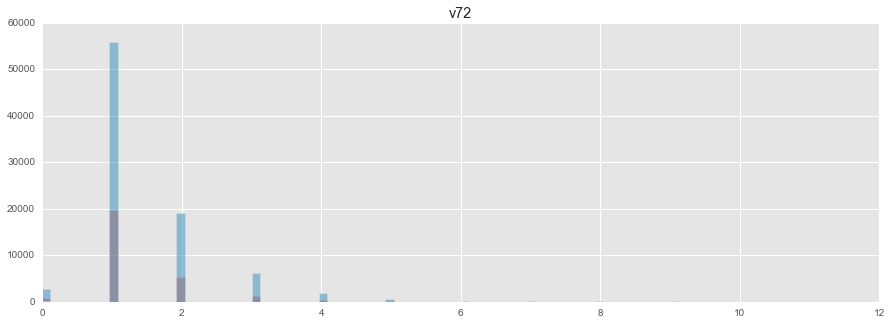

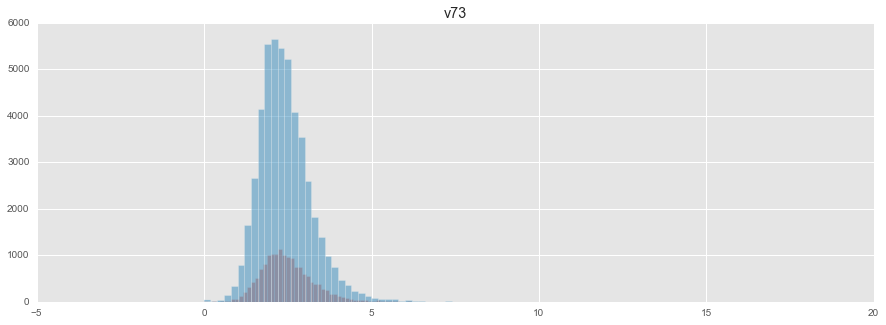

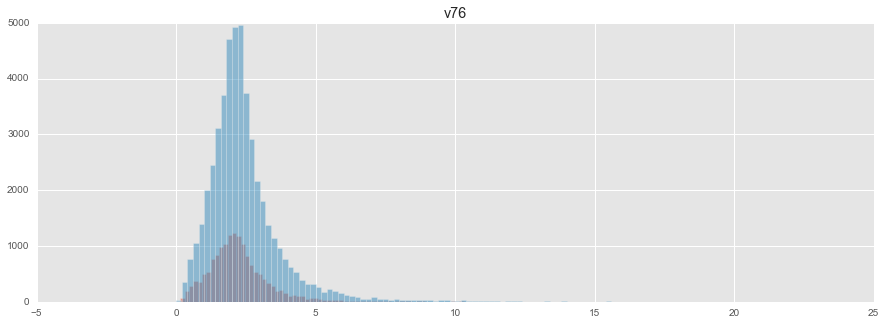

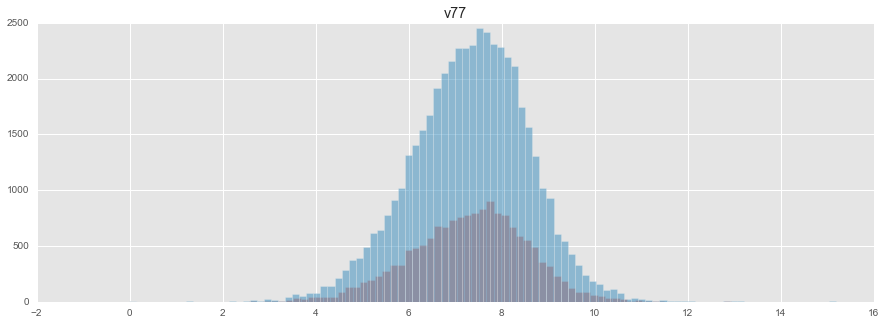

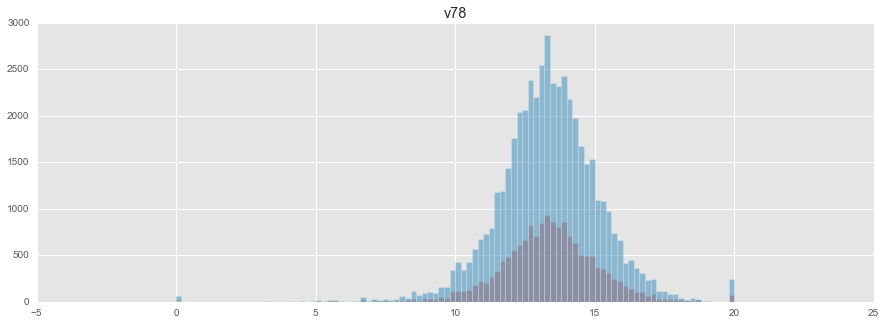

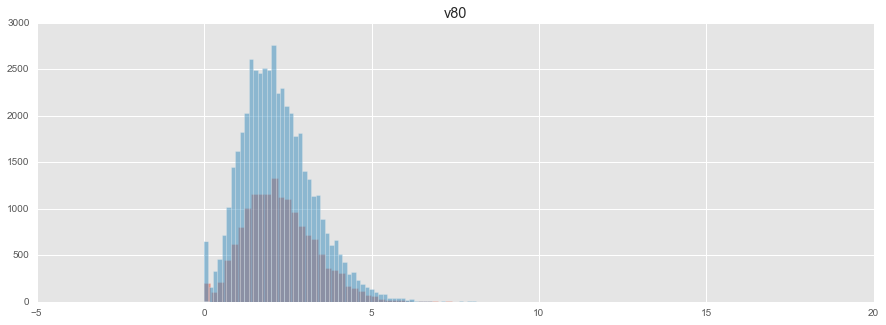

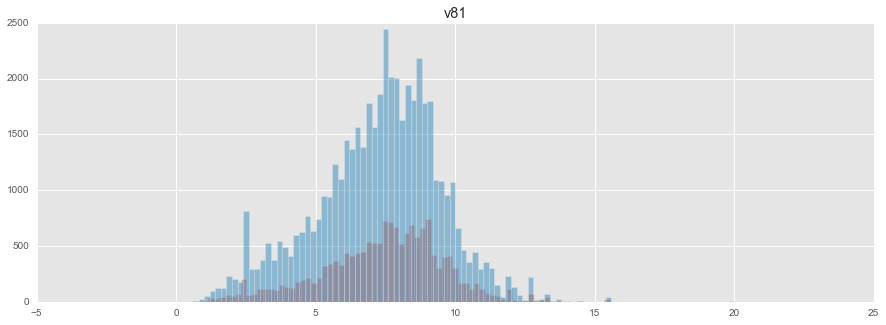

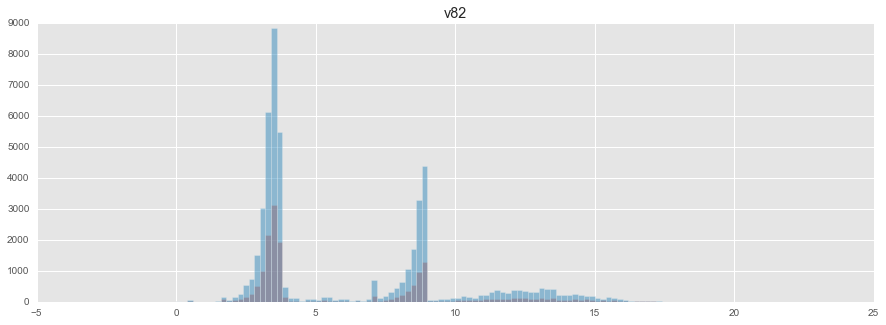

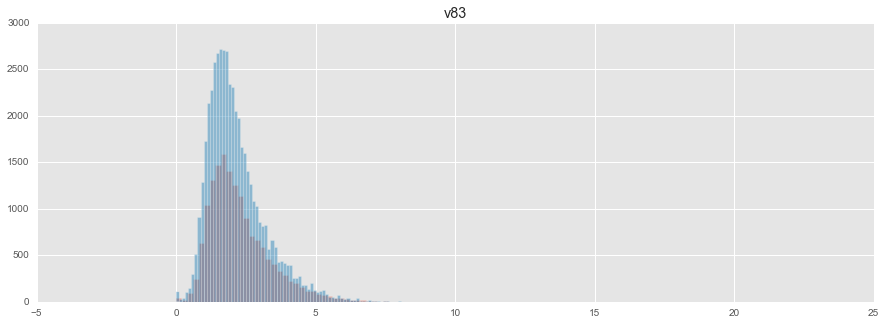

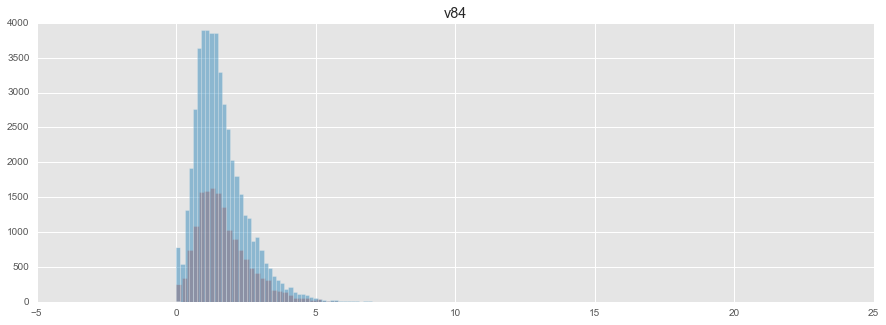

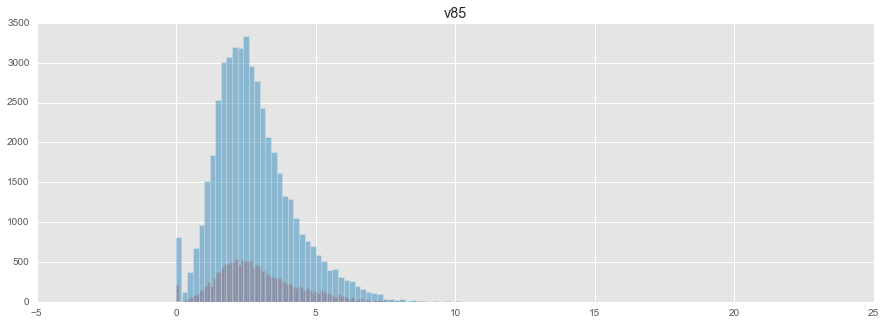

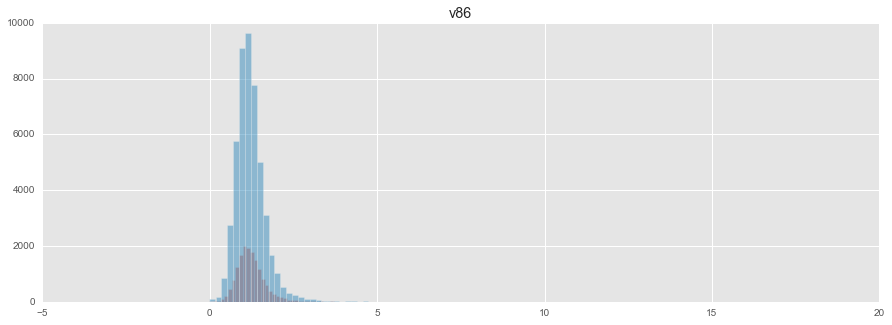

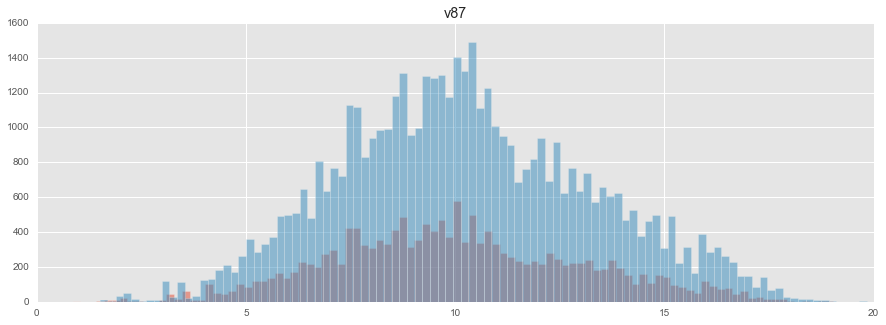

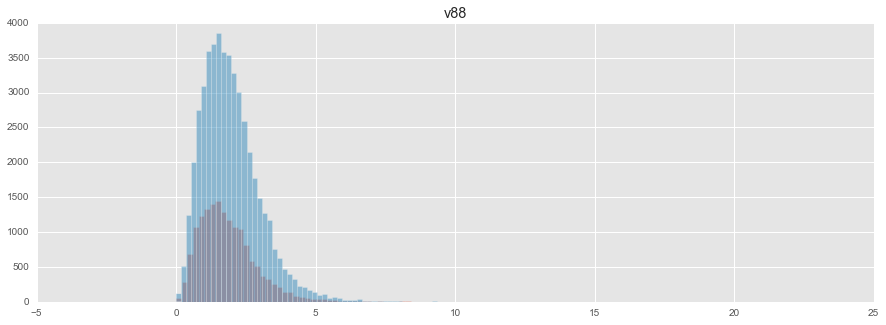

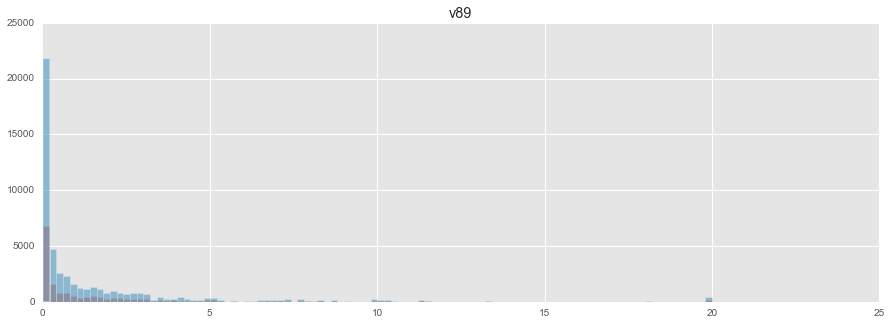

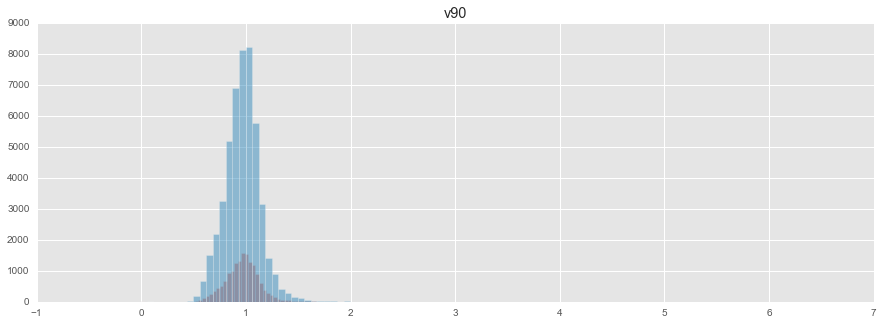

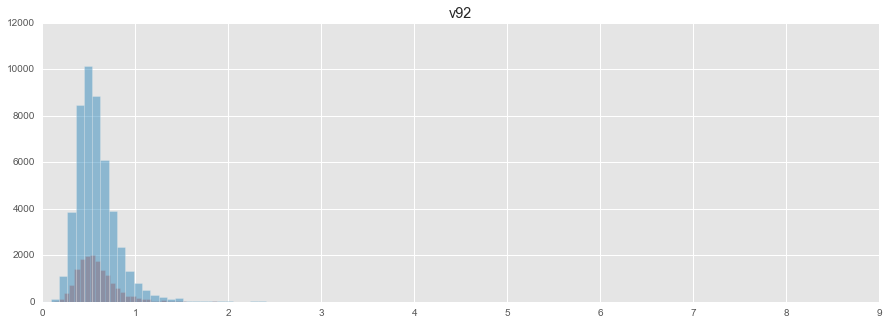

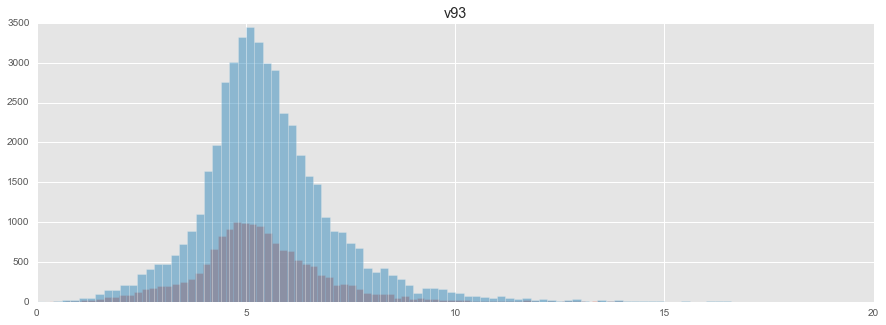

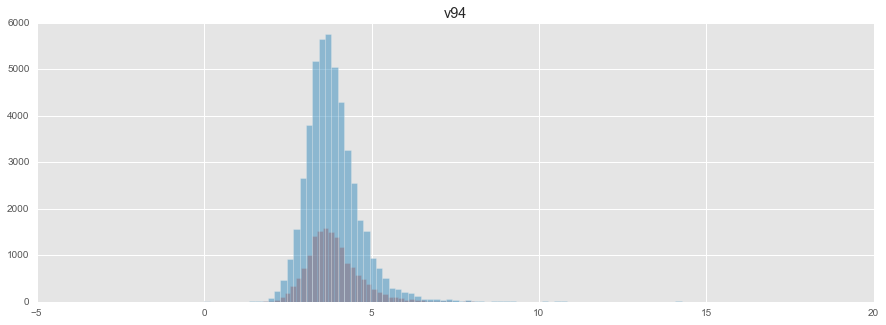

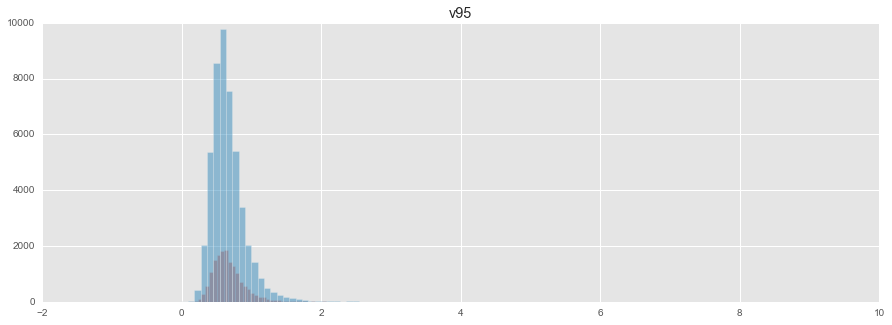

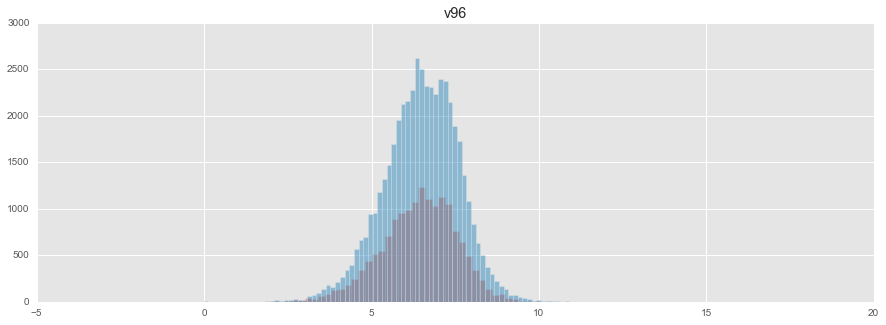

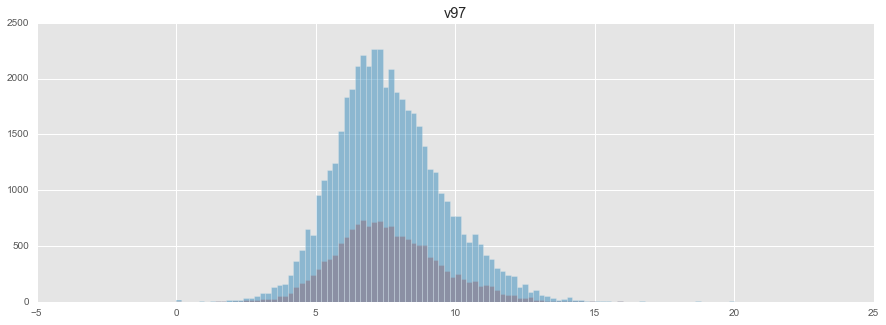

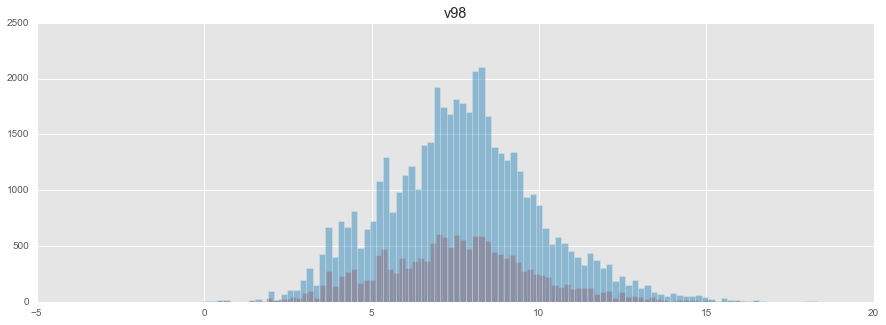

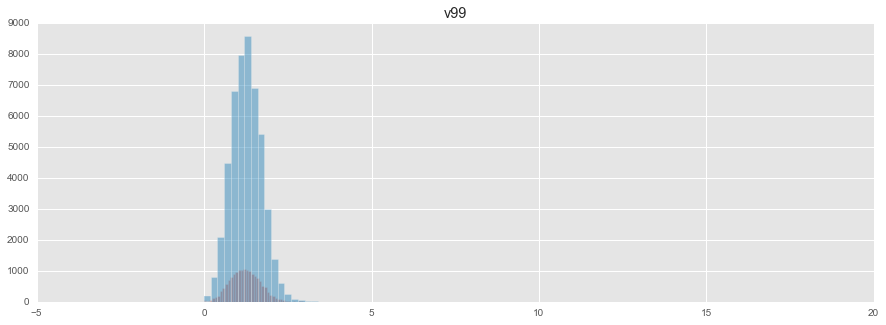

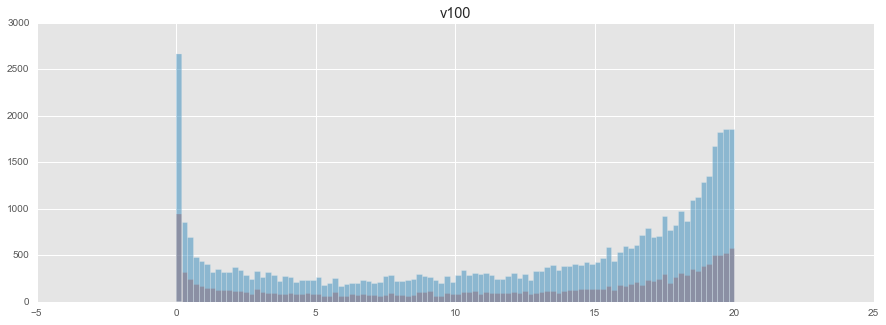

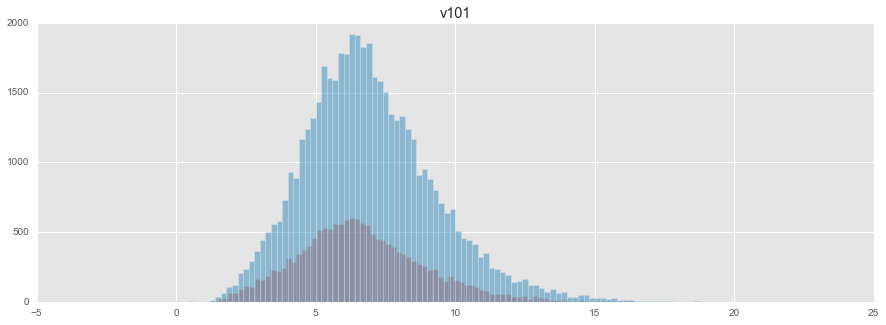

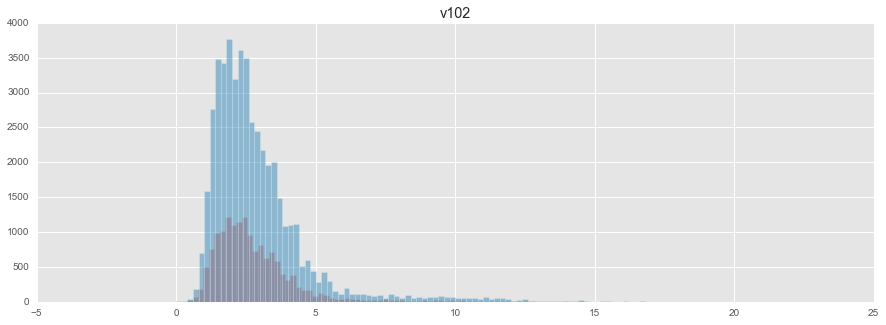

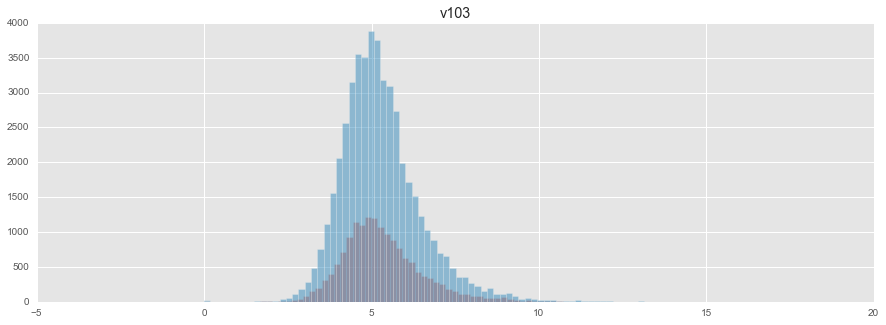

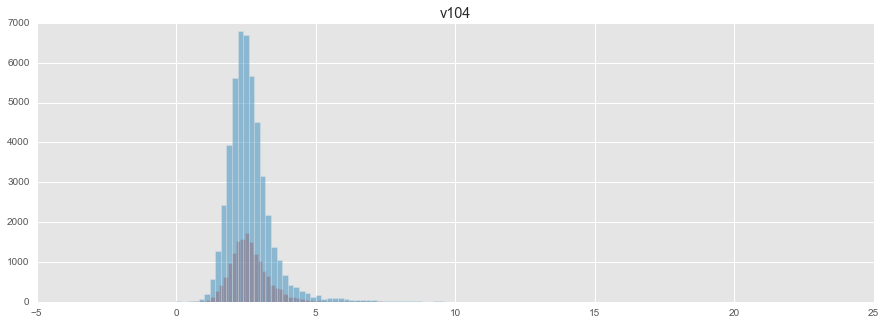

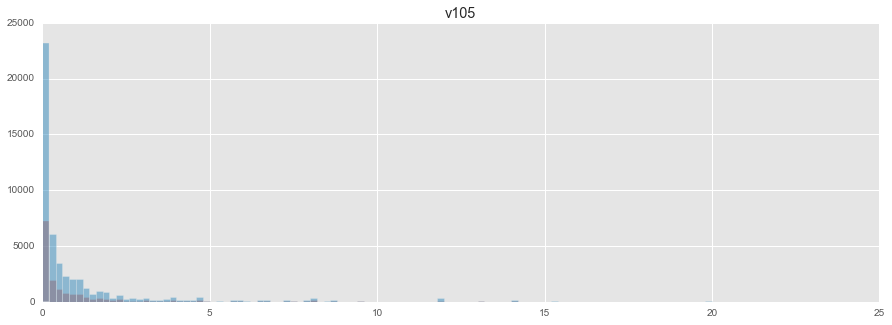

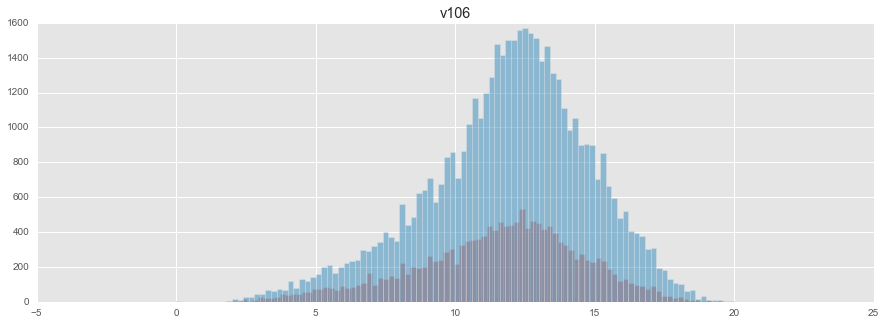

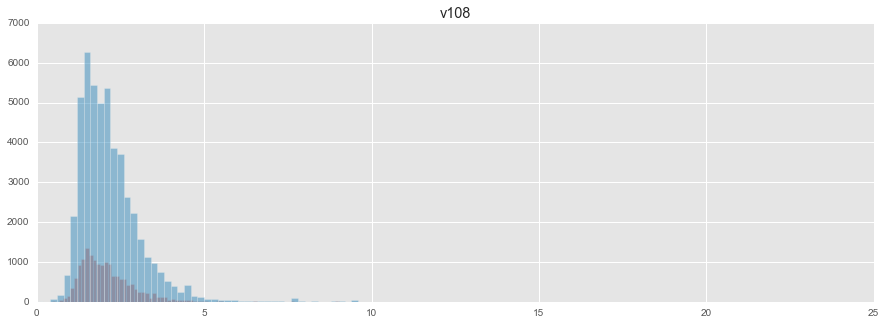

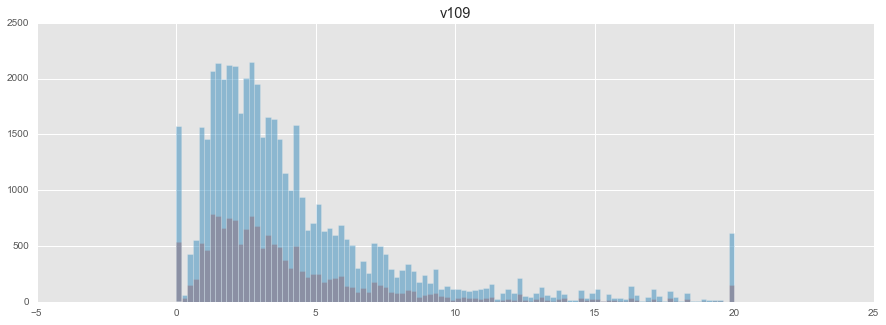

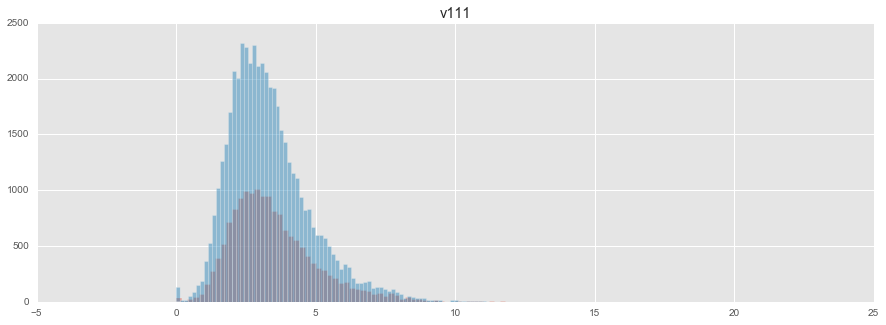

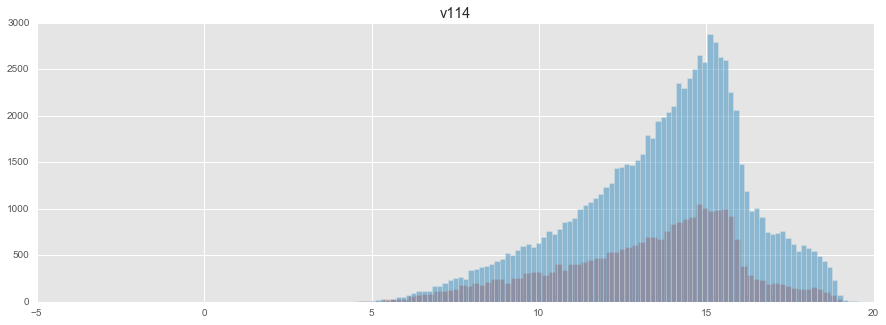

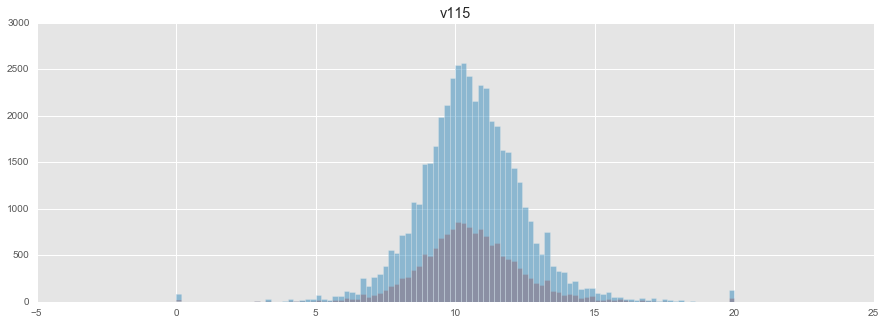

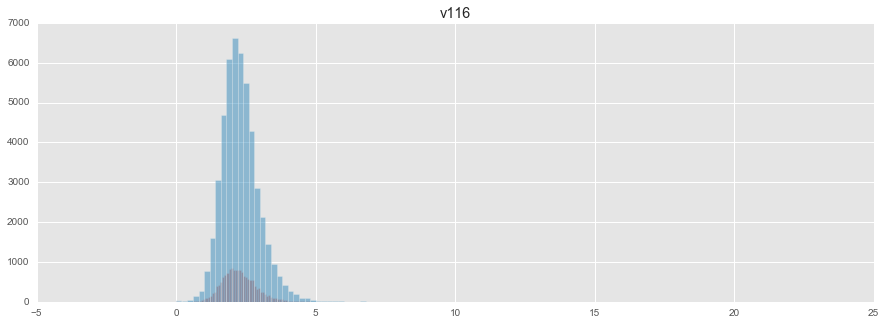

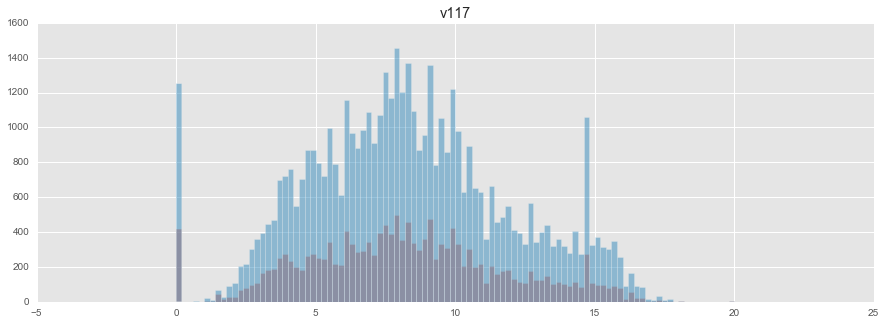

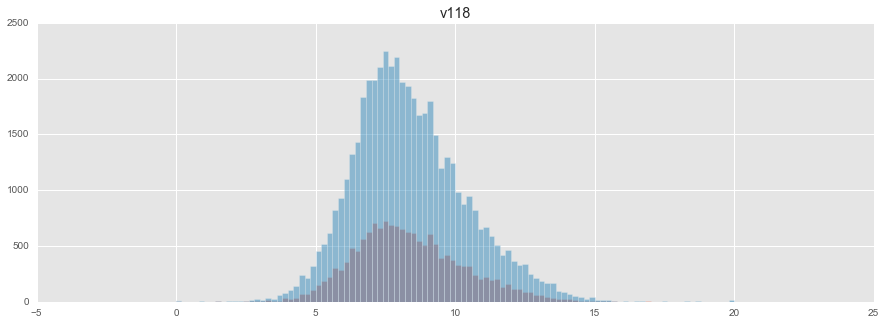

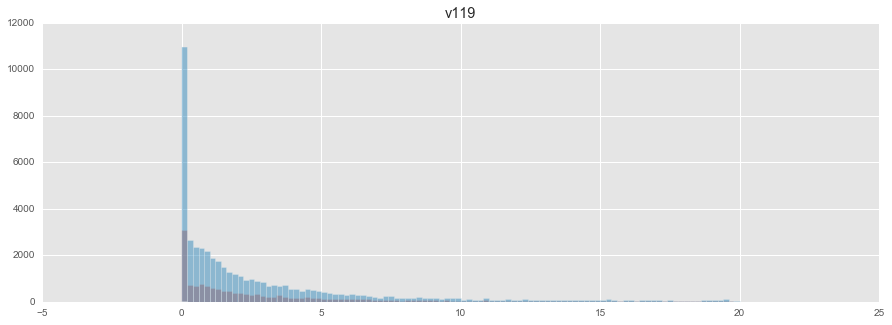

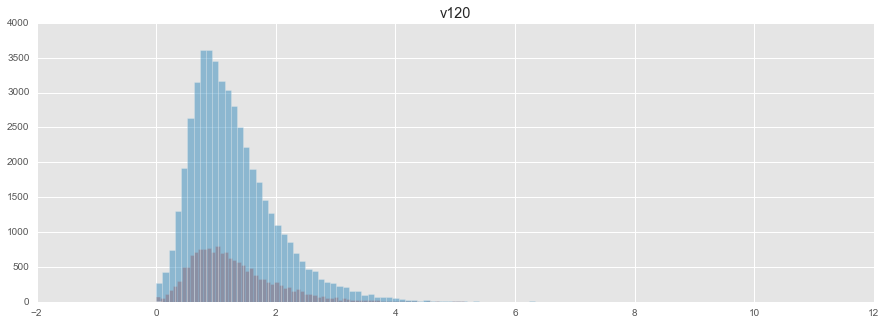

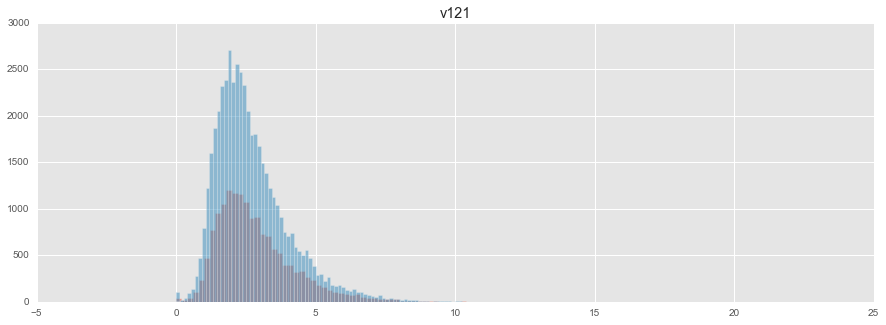

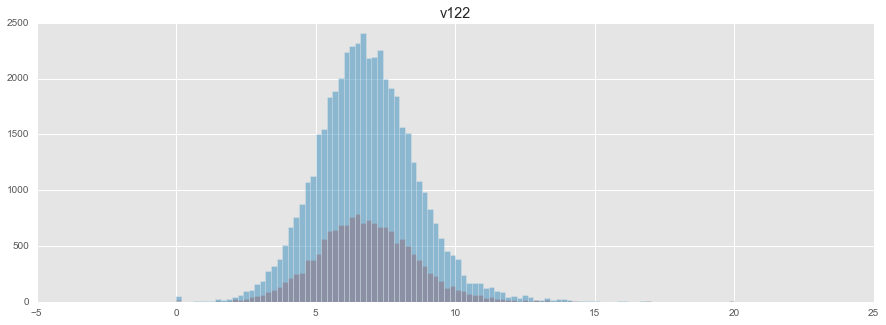

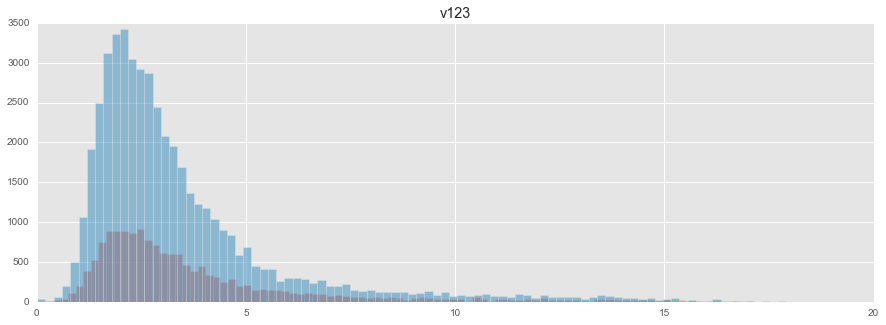

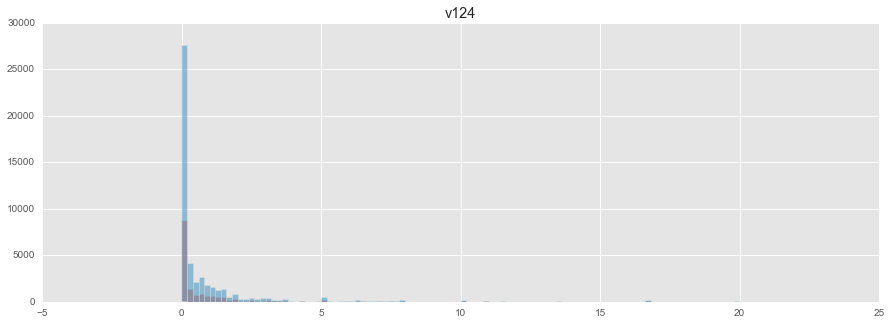

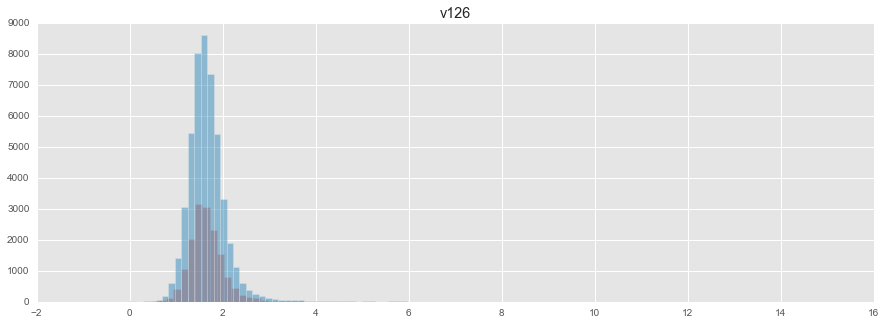

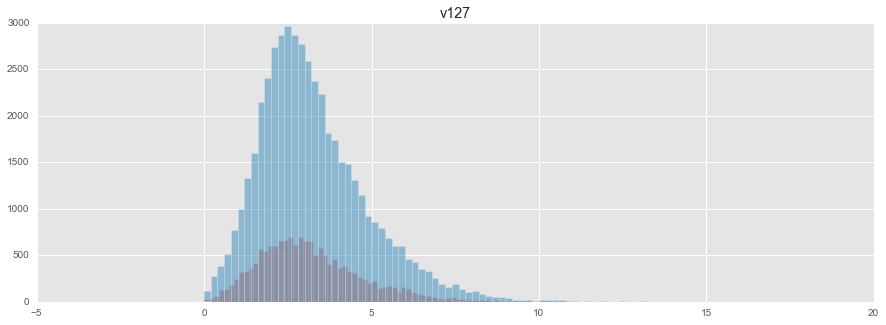

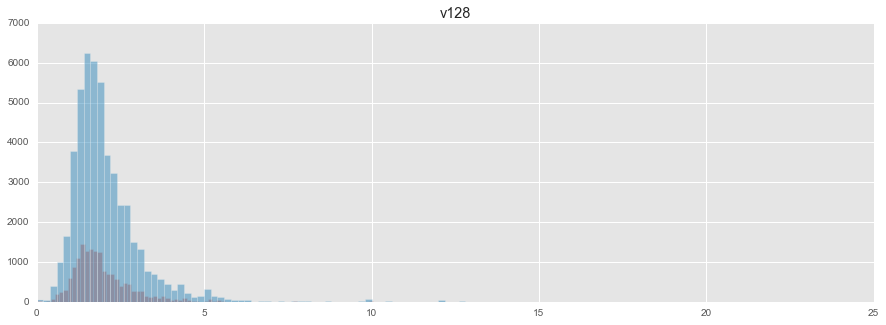

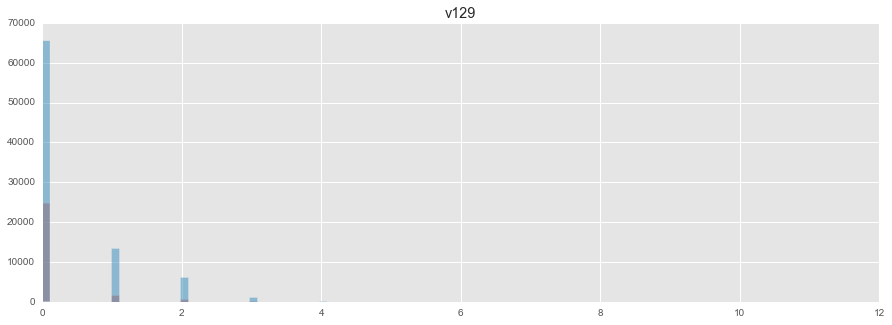

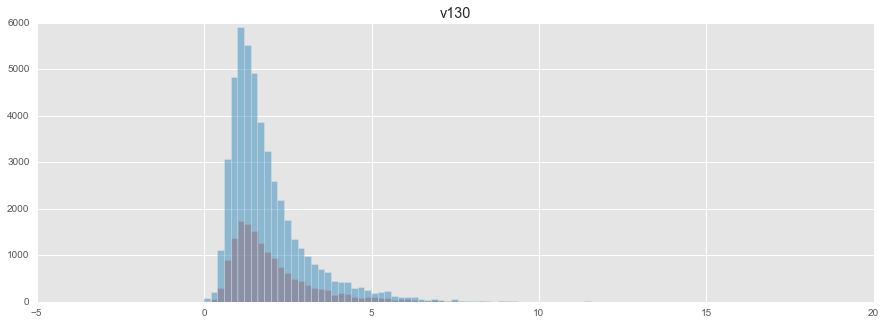

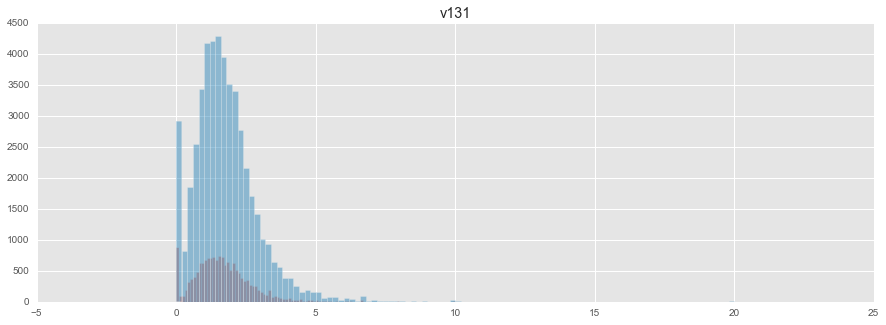

In [90]:
figsize(15, 5)
nums = data.get('train', 'nums')
for v in nums:
    plt.figure()
    plt.title(v)
    hist_num(nums[v])

## cats

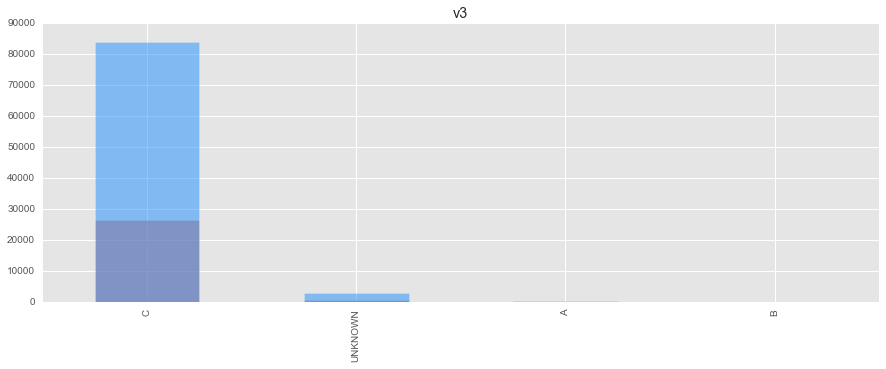

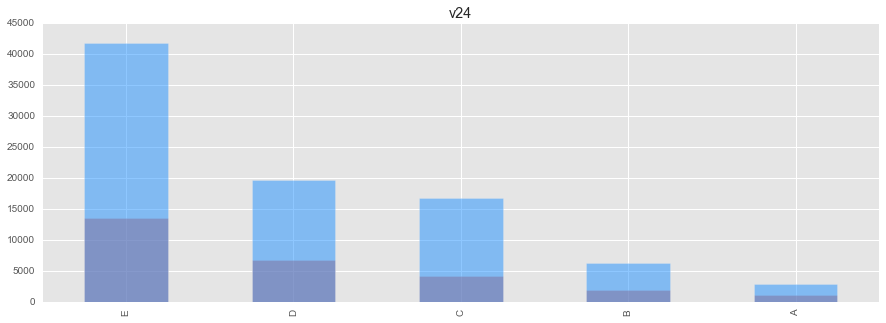

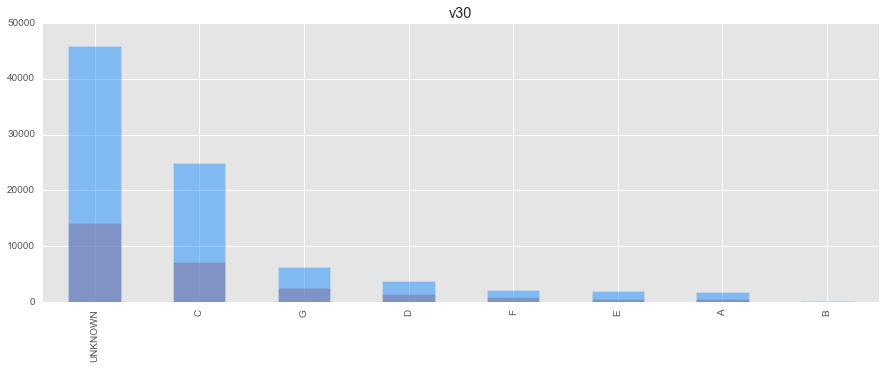

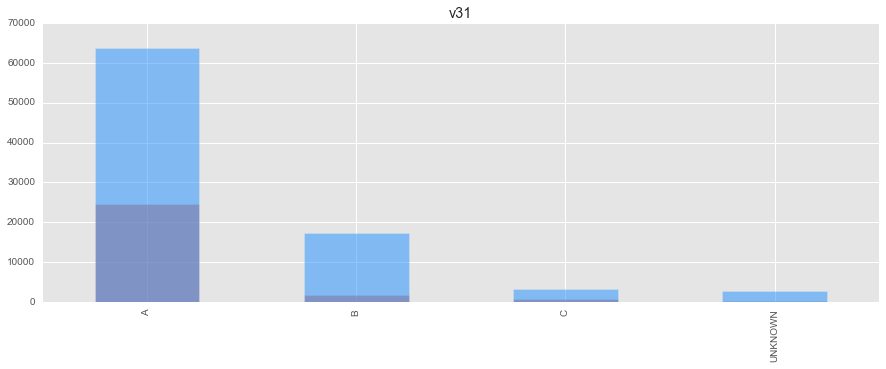

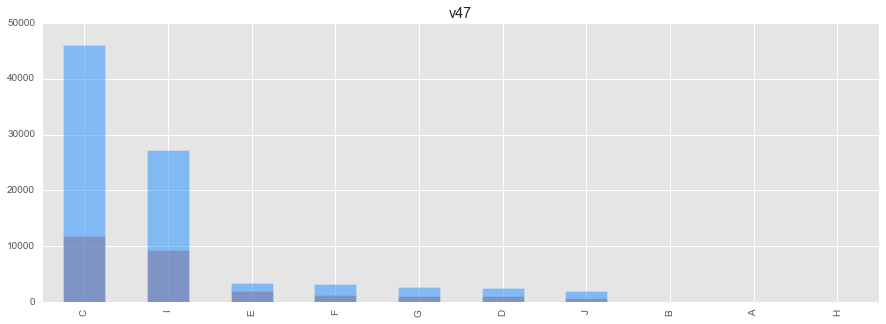

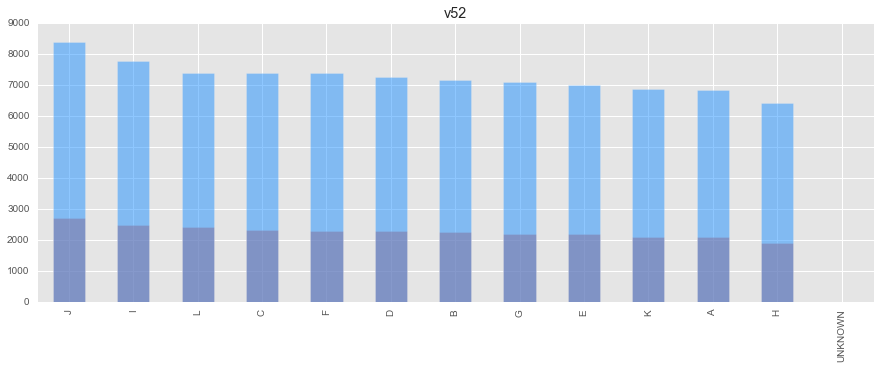

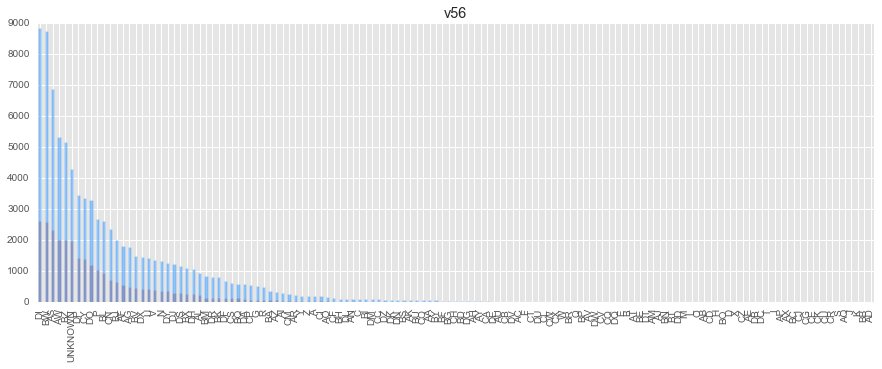

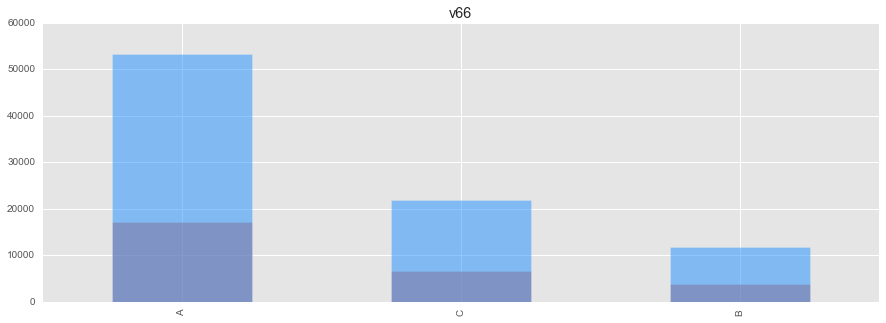

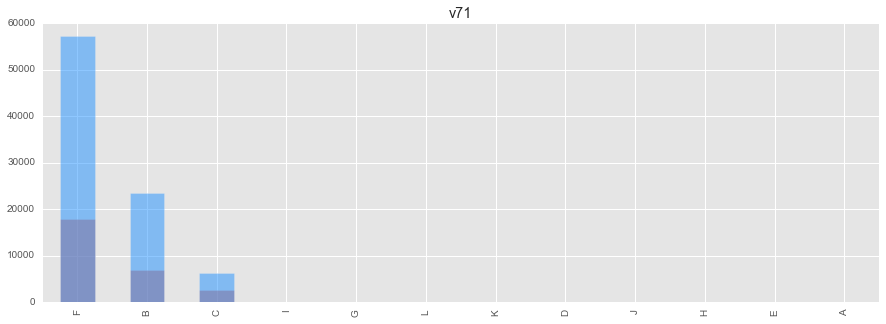

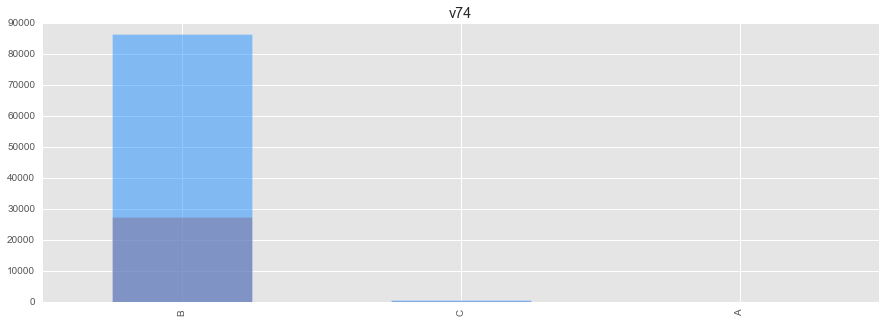

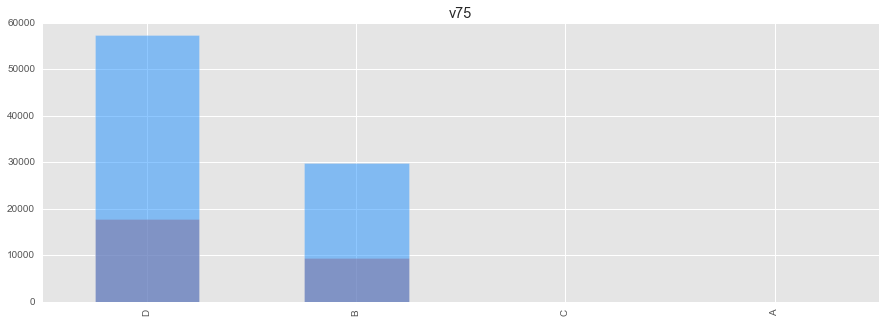

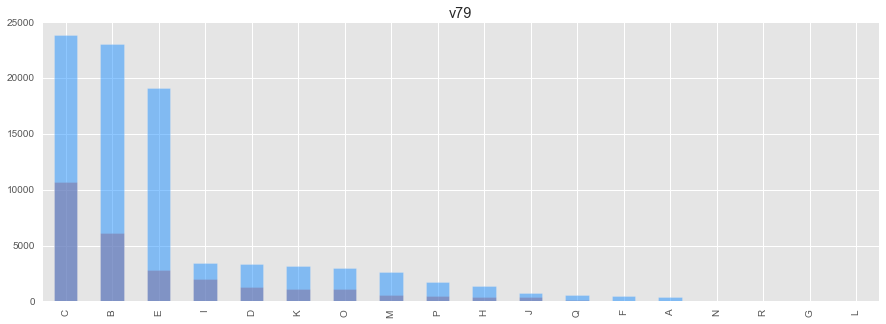

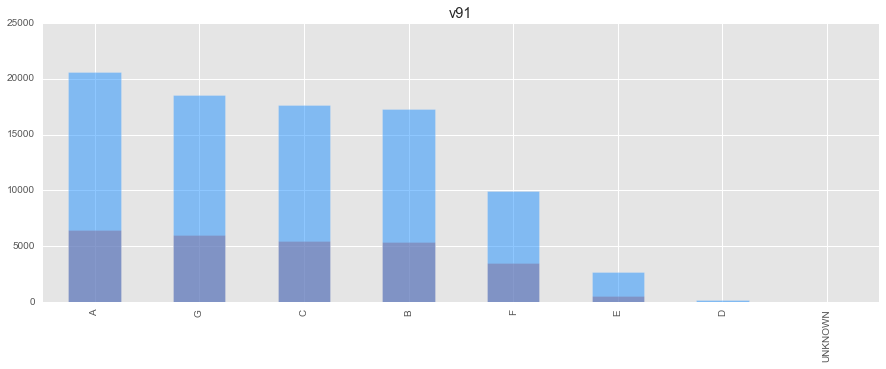

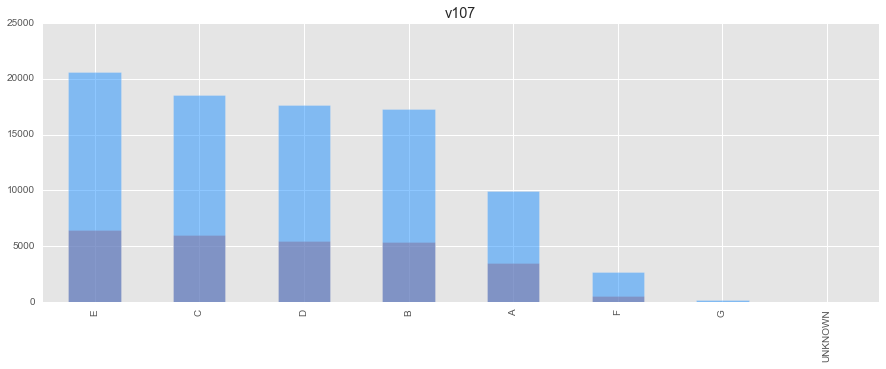

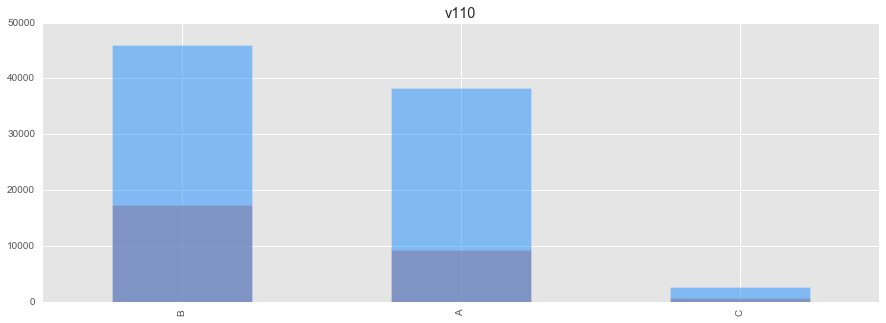

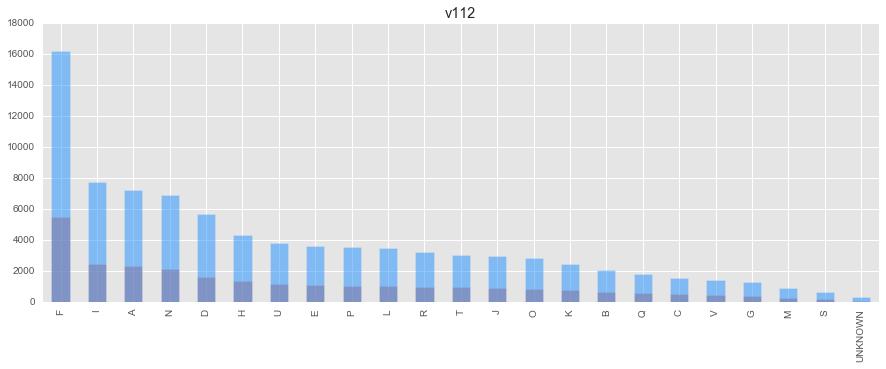

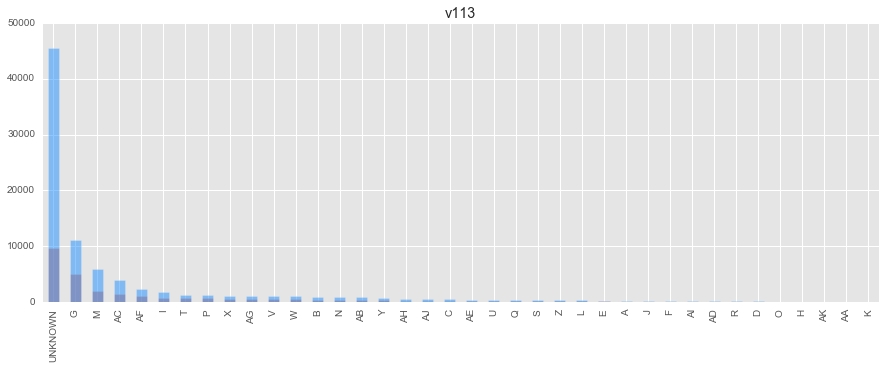

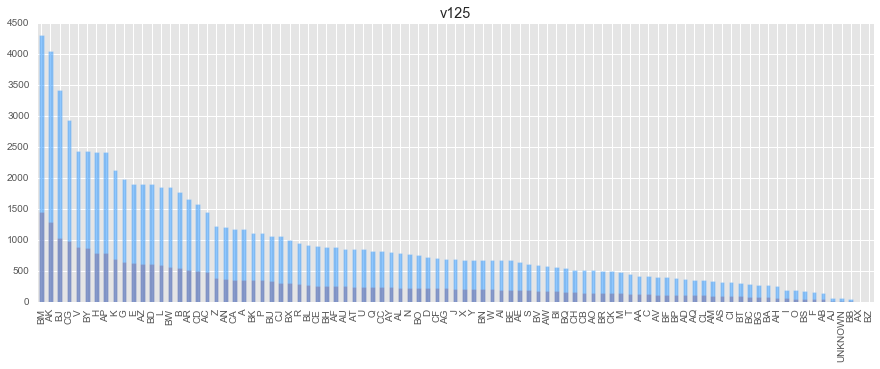

In [108]:
figsize(15, 5)
cats = data.get('train', 'cats')
for v in cats:
    if v != 'v22':
        plt.figure()
        plt.title(v)
        bar_cat(cats[v])

## v50

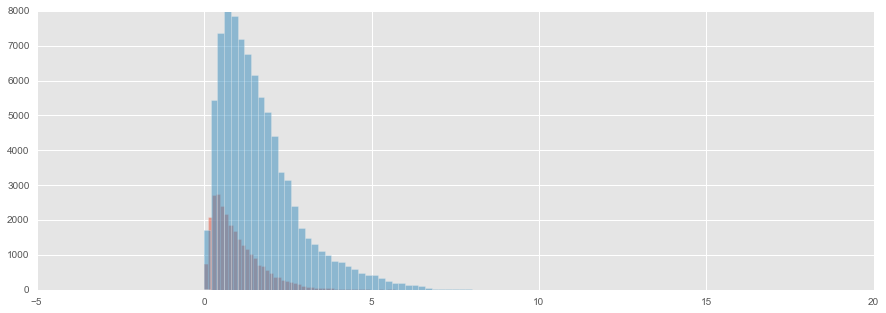

In [9]:
v50 = data.get('train', 'nums')['v50']
hist_num(v50)

In [48]:
v50[y == 0].apply(round).value_counts()

1.0     13087
0.0      8597
2.0      4161
3.0      1007
4.0       287
5.0       112
6.0        40
7.0         5
12.0        1
9.0         1
8.0         1
Name: v50, dtype: int64

In [49]:
v50[y == 1].apply(round).value_counts()

1.0     36836
2.0     23068
0.0     10565
3.0      9093
4.0      4154
5.0      2110
6.0       829
7.0       186
8.0        51
10.0       12
9.0        11
11.0        7
13.0        6
12.0        5
14.0        2
20.0        1
Name: v50, dtype: int64

In [10]:
v50 = v50.copy()
v50[v50 > 8.0] = 8.0

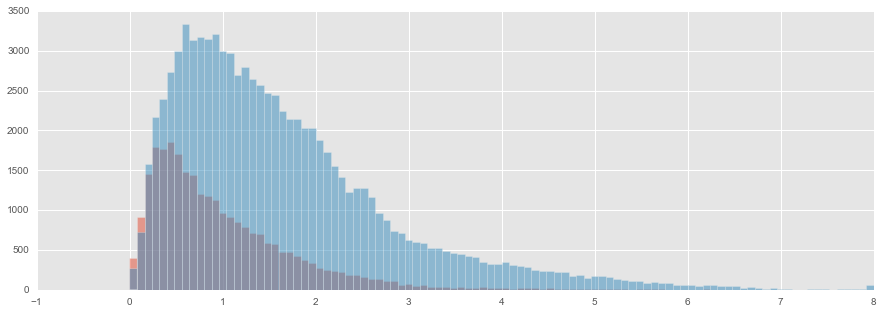

In [51]:
hist_num(v50)

In [52]:
v50.describe()

count    1.142350e+05
mean     1.503076e+00
std      1.159506e+00
min     -9.091393e-07
25%      6.587918e-01
50%      1.211944e+00
75%      2.007189e+00
max      8.000000e+00
Name: v50, dtype: float64

In [53]:
len(v50.unique()) / len(v50)

0.9986616632114834

## v66

In [11]:
v66 = data.get('train', 'cats')['v66']
v66.value_counts()

A    70353
C    25704
B    18264
dtype: int64

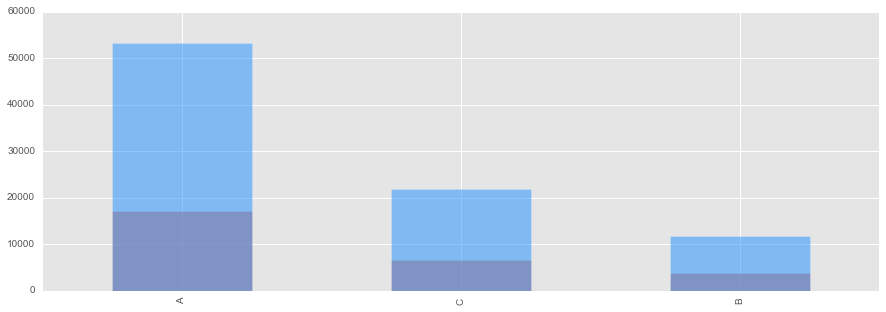

In [61]:
bar_cat(v66)

### v66 + v50

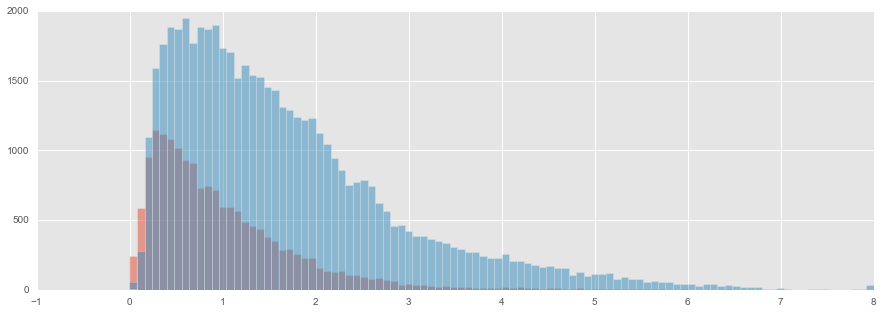

In [56]:
hist_num(v50[v66 == 'A'])

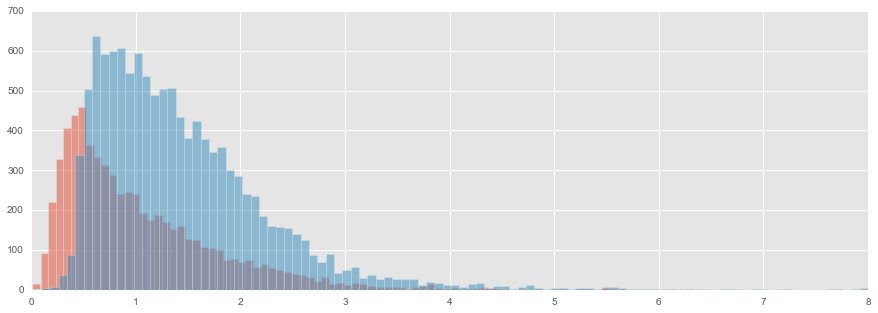

In [57]:
hist_num(v50[v66 == 'B'])

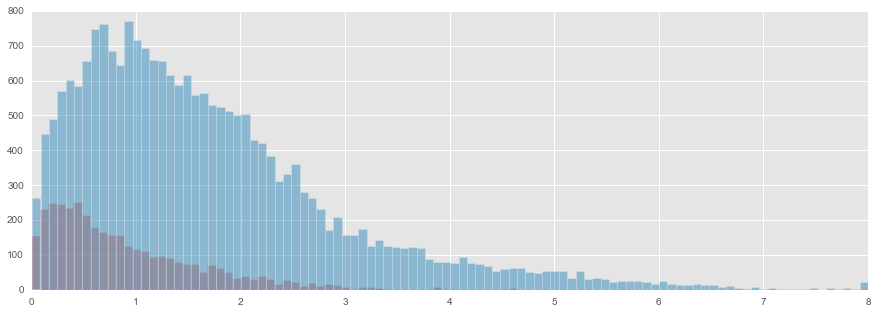

In [58]:
hist_num(v50[v66 == 'C'])

## v22

18211


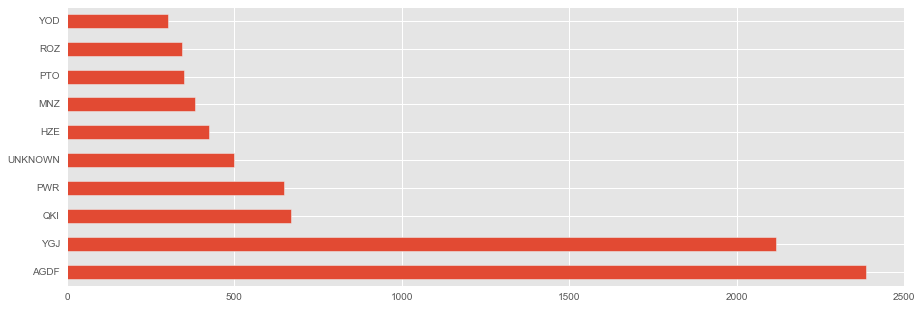

In [59]:
v22 = data.get('train', 'cats')['v22']
print(len(v22.unique()))
v22.value_counts().head(10).plot.barh()

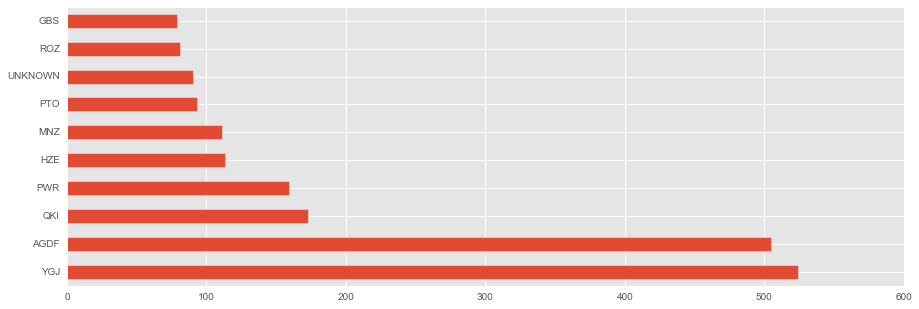

In [68]:
v22[y == 0].value_counts().head(10).plot.barh()

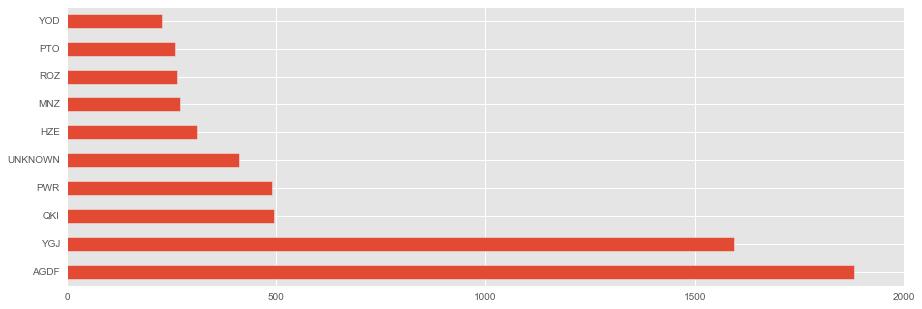

In [69]:
v22[y == 1].value_counts().head(10).plot.barh()

In [60]:
ratio_cat(v22).head(10)

,ratio,cnt
ABOF,0.511111,69.0
AGON,0.504505,56.0
TVR,0.491803,60.0
AMR,0.481481,52.0
PTJ,0.471074,57.0
PSE,0.463235,63.0
NWG,0.439655,51.0
ADDF,0.422819,63.0
MNZ,0.409594,111.0
NRT,0.400000,68.0


### v22 + v66

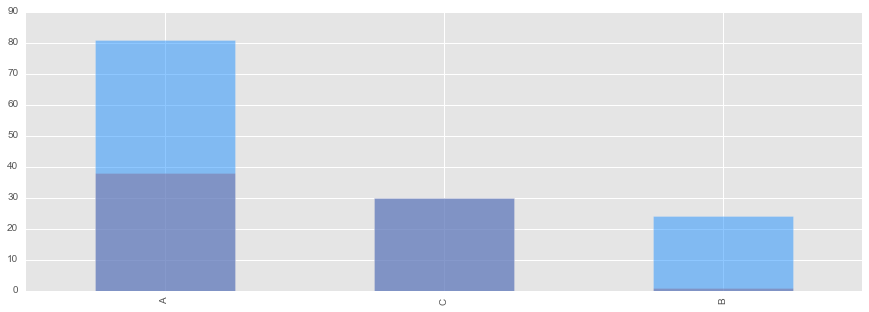

In [131]:
bar_cat(v66[v22 == 'ABOF'])

## v12

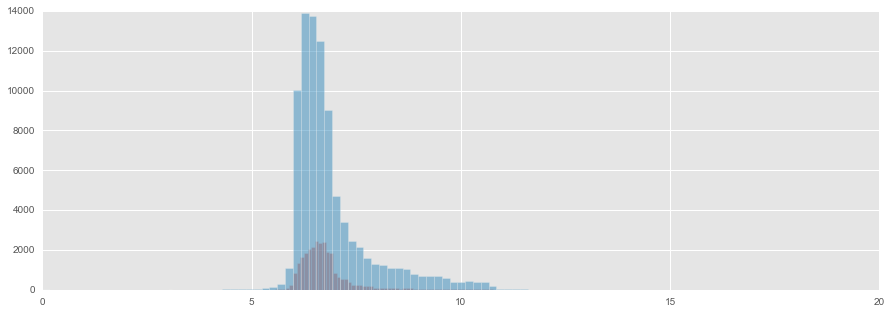

In [18]:
v12 = data.get('train', 'nums')['v12']
hist_num(v12)

In [19]:
len(v12.unique()) / len(v12)

0.9992389849633926

In [20]:
v12.describe()

count    1.142350e+05
mean     6.881304e+00
std      9.244945e-01
min      5.143224e-07
25%      6.322471e+00
50%      6.612969e+00
75%      7.019983e+00
max      1.871055e+01
Name: v12, dtype: float64

In [21]:
v12[y == 0].apply(round).value_counts()

7.0     14506
6.0     10025
8.0      1507
9.0       650
10.0      399
11.0      171
5.0        29
12.0        9
4.0         2
3.0         1
Name: v12, dtype: int64

In [22]:
v12[y == 1].apply(round).value_counts()

7.0     35809
6.0     35561
8.0      7647
9.0      4440
10.0     2474
11.0      630
5.0       260
4.0        69
12.0       21
3.0        11
2.0         9
19.0        1
16.0        1
15.0        1
14.0        1
0.0         1
Name: v12, dtype: int64

### v12 + v50

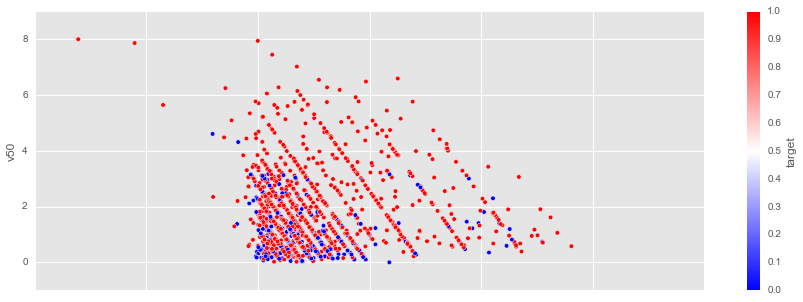

In [50]:
pd.concat([v12, v50, y], axis=1).sample(2000).plot.scatter('v12', 'v50', c='target', cmap='bwr')

## v56

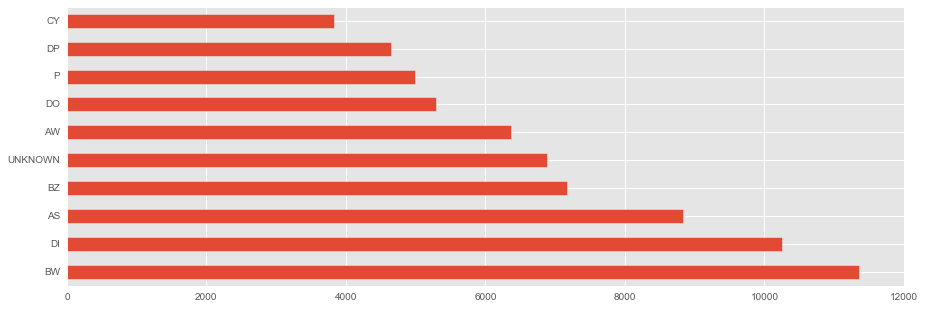

In [53]:
v56 = data.get('train', 'cats')['v56']
v56.value_counts().head(10).plot.barh()

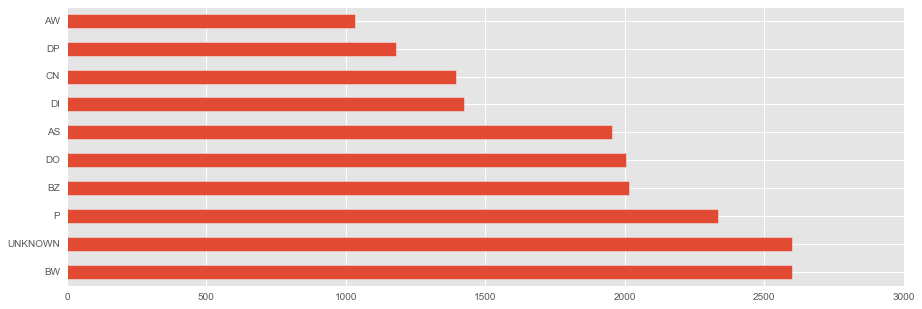

In [54]:
v56[y == 0].value_counts().head(10).plot.barh()

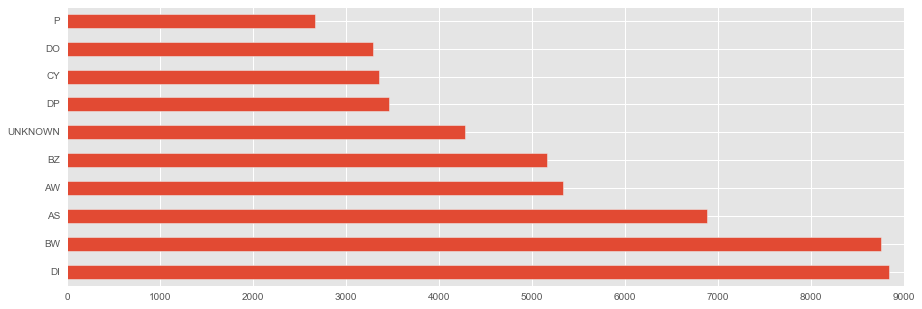

In [55]:
v56[y == 1].value_counts().head(10).plot.barh()

In [61]:
ratio_cat(v56).head(10)

,ratio,cnt
P,0.875047,2332.0
AN,0.797980,79.0
Y,0.670213,126.0
DF,0.665179,447.0
CC,0.627660,59.0
DO,0.609066,2002.0
UNKNOWN,0.606443,2598.0
CN,0.594295,1396.0
CM,0.578313,144.0
DY,0.570518,716.0


### v56 + v66

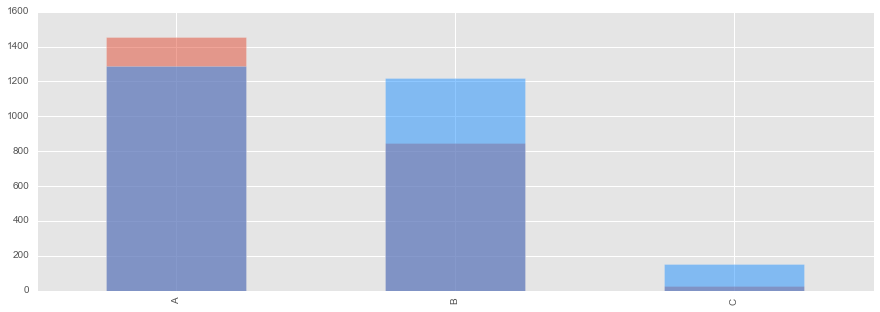

In [62]:
bar_cat(v66[v56 == 'P'])

## v114

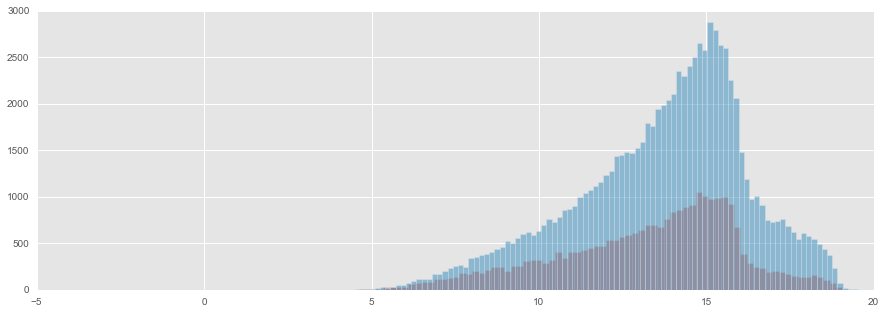

In [74]:
v114 = data.get('train', 'nums')['v114']
hist_num(v114)

## v129

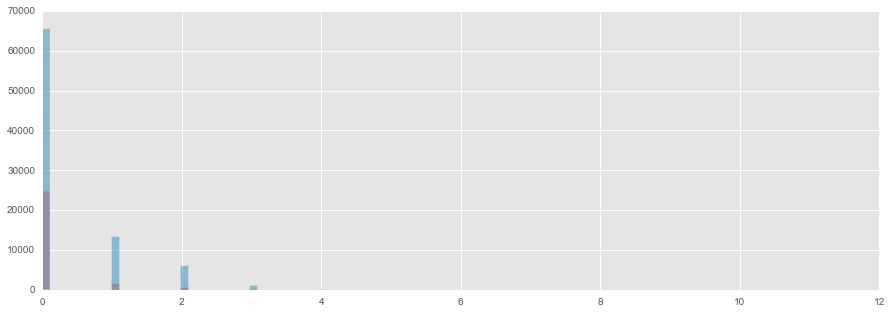

In [8]:
v129 = data.get('train', 'nums')['v129']
hist_num(v129)

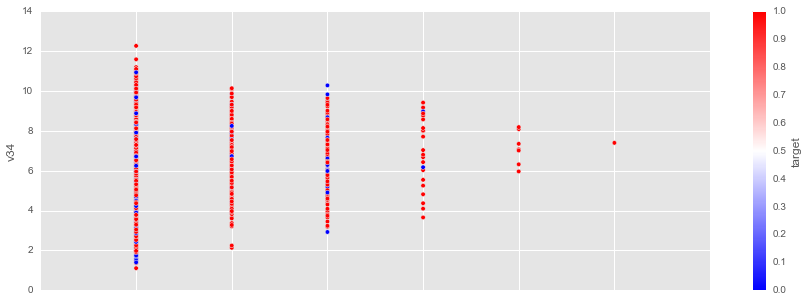

In [37]:
v34 = data.get('train', 'nums')['v34']
pd.concat([v129, v34, y], axis=1).sample(2000).plot.scatter('v129', 'v34', c='target', cmap='bwr')